In [1]:
import sys
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/')
from functions import *

from glob import glob

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/analysis/')
from clearmem_my_functions import *

import sys
#sys.path.append('/home/jade6100/.local/lib/python3.7/site-packages')
import scikit_posthocs as sp
import itertools

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os
import numpy as np
import pandas as pd
import scipy.io
from scipy import stats
from sklearn.manifold import MDS
import scipy.spatial.distance as sp_distance
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#from scipy import stats
#import scikit_posthocs as sp

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold


def vsim(data, parcel=None):
    
    if parcel is None:
        parcel_row = pd.DataFrame(np.flip(np.array(data.T))).T
        
    else:
        parcel_row = pd.DataFrame(np.flip(np.array(data.iloc[[parcel]].T))).T
    a = np.array(parcel_row.T.iloc[:, 0: 1]).squeeze()
    n = int(np.sqrt(len(a)*2))+1
    mask = np.tri(n,dtype=bool, k=-1) # or np.arange(n)[:,None] > np.arange(n)
    out = np.zeros((n,n))
    out[mask] = a
    out = out + out.T - np.diag(np.diag(out))
    out[np.diag_indices_from(out)]
    sim_mat = pd.DataFrame(np.flip(out))
  

    return(sim_mat)
    

def show_code(function):  
    import inspect
    lines = inspect.getsource(function)
    print(lines)
    
def reduce_memory_usage(df, verbose=False):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df


net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
ops_cols = ['#F0180A', '#F08B0A', '#6DAE45', '#0A5AF0']


from glob import glob
subj_ids = '/pl/active/banich/studies/wmem/fmri/operation_rsa/subj/*'
subj_ids_sorted = sorted(glob(subj_ids, recursive = True))

for i in range(0,len(subj_ids_sorted)):
    subj_ids_sorted[i] = subj_ids_sorted[i].replace('/pl/active/banich/studies/wmem/fmri/operation_rsa/subj/subj_operation_sub-', '').replace('/', '').replace('.mat', '')
    #subj_ids_sorted[i] = 'sub' + subj_ids_sorted[i] + "-" + str(i+1)

evidence_glob_path = '/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/clearmem_v1_*/mvpa_operation/parse_sh10_4/table_target_evidence_operation_highres001_brain_grey_3mm_bin0.2_bold_mcf_brain_hpass_dt_shift10tr_norest_fixpen50.csv'
accuracy_glob_path = '/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/clearmem_v1_*/mvpa_operation/parse_sh10_4/table_target_accuracy_operation_highres001_brain_grey_3mm_bin0.2_bold_mcf_brain_hpass_dt_shift10tr_norest_fixpen50.csv'
from glob import glob

evidence_sub_idx = sorted(glob(evidence_glob_path, recursive = True))
accuracy_sub_idx = sorted(glob(accuracy_glob_path, recursive = True))

for i in range(0,len(evidence_sub_idx)):
    evidence_sub_idx[i] = evidence_sub_idx[i].replace('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/clearmem_v1_', '').replace('sub', '')
    evidence_sub_idx[i] = evidence_sub_idx[i].replace('/mvpa_operation/parse_sh10_4/table_target_evidence_operation_highres001_brain_grey_3mm_bin0.2_bold_mcf_brain_hpass_dt_shift10tr_norest_fixpen50.csv', '')

for i in range(0,len(accuracy_sub_idx )):
    accuracy_sub_idx[i] = accuracy_sub_idx[i].replace('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/clearmem_v1_', '').replace('sub', '')
    accuracy_sub_idx[i] = accuracy_sub_idx[i].replace('/mvpa_operation/parse_sh10_4/table_target_accuracy_operation_highres001_brain_grey_3mm_bin0.2_bold_mcf_brain_hpass_dt_shift10tr_norest_fixpen50.csv', '')

evidence_sub_ids_df = pd.DataFrame(evidence_sub_idx).rename({0:'ID'}, axis=1)
accruacy_sub_ids_df = pd.DataFrame(accuracy_sub_idx).rename({0:'ID'}, axis=1)

ev_acc_ids_df = pd.merge(evidence_sub_ids_df, accruacy_sub_ids_df, on ='ID')

sub_ids_df = pd.DataFrame(subj_ids_sorted).rename({0:'ID'}, axis=1)
sub_ids_df['matched_id'] = list(range(1,56,1))
 
matched_ids_df = pd.merge(ev_acc_ids_df , sub_ids_df, on ="ID")


add_zero_list =[]
for i in list(matched_ids_df['matched_id']):
    
    if len(str(i)) == 1:
        x = "00" + str(i)
    else: 
        x = "0" + str(i)
    
    add_zero_list.append(x)
    
matched_ids_df['matched_id'] = add_zero_list

accuracy_list = []
evidence_list = []
for i,j in zip(sorted(glob(accuracy_glob_path, recursive = True)),
               sorted(glob(evidence_glob_path, recursive = True))):
               accuracy_list.append(pd.read_csv(i)[['subject_id', 't1_maintain', 't2_repCat', 't3_target', 't4_global', 'total_accuracy']])
               evidence_list.append(pd.read_csv(j))

def create_func_mat(data):
    
    from sklearn.preprocessing import MinMaxScaler
    
    X = np.array(data)
    
    X_Z = (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, dtype=np.float64, ddof=1, keepdims=True)
    D, rho = spearmanr(np.array(X_Z), axis=1)

    perc = np.array([np.percentile(x, 90) for x in D])

    for i in range(D.shape[0]):
        D[i, D[i,:] < perc[i]] = 0    
    
    D[D < 0] = 0
    #D = 1 - pairwise_distances(D, metric = 'cosine')
    #scaler = MinMaxScaler(feature_range=(.5,1))

    #D = scaler.fit_transform(D)
    
    D = pd.DataFrame(D)
    # D = aff
    
    return(D)


group = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/group_sm_vector_spearman/Output/Results/group_sm_vector_spearman_Full_Subtypes.csv')

gmat_main = pd.DataFrame(create_func_mat(group.iloc[:, 5:].iloc[:, 0:10332]))
gmat_replace = pd.DataFrame(create_func_mat(group.iloc[:, 5:].iloc[:, 10332:int(10332*2)]))
gmat_suppress = pd.DataFrame(create_func_mat(group.iloc[:, 5:].iloc[:, int(10332*2):int(10332*3)]))
gmat_clear = pd.DataFrame(create_func_mat(group.iloc[:, 5:].iloc[:, int(10332*3):int(10332*4)]))

group_subs = group[['Unnamed: 0', 'Subtype']].rename({'Unnamed: 0':'index'}, axis=1)


glob_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/subj_sm_ind/*'
from glob import glob

sub_idx = glob(glob_path, recursive = True)

for i in range(0,len(sub_idx)):
    sub_idx[i] = sub_idx[i].replace('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/subj_sm_ind/', '').replace('/', '')
    
sub_idx = list(filter(lambda k: 'sub' in k, sub_idx))

sub_idx = list(filter(lambda k: '.csv' not in k, sub_idx))

#remove sub019 because no accuracy or evdidence classifiers
sub_idx = sorted([x for x in sub_idx if 'sub019_sm_vector' not in x])
#sub_idx = sub_idx[0:3]


def get_new_mats(data, parcel_index, gfm):
    
    sfm = pd.DataFrame(create_func_mat(data))
    sfm.columns = parcel_index
    sfm.index = parcel_index
    smf_cols = list(pd.DataFrame(sfm).columns)

    not_in_list = [x for x in list(range(360)) if x not in smf_cols]
    
    sfm_copy = sfm.copy()
    for i in not_in_list:
        sfm_copy[i] = gfm[i]
        
    sfm_copy = sfm_copy.T

    for i in not_in_list:
        sfm_copy[i] = gfm[i]

    sfm_copy = pd.DataFrame(sfm_copy.sort_index().sort_index(axis=1))


    return(sfm_copy)


# In[ ]:


def get_mats(data_path, group_subs):
    
    df1 = pd.read_csv(data_path).drop('Subtype', axis =1)

    main_cols = list(map(str,range(0, 10332)))
    replace_cols = list(map(str,range(10332, 10332*2)))
    suppress_cols = list(map(str,range(10332*2, 10332*3)))
    clear_cols = list(map(str,range(10332*3, 10332*4)))
    
    lh = list(df1[df1['node'].str.contains("LH")]['node'].str.replace(r'\D', '').astype(int) -1)
    rh = list(df1[df1['node'].str.contains("RH")]['node'].str.replace(r'\D', '').astype(int) + 179)

    parcel_index = lh + rh
    df1.index = parcel_index
    
    not_in_list = [x for x in list(range(360)) if x not in parcel_index]
    
    df1_cols = list(df1.iloc[:, 4:].columns)
    
    df1['index'] = df1.index
    df1 = pd.merge(df1, group_subs, on = 'index')
    df1.index = parcel_index
    
    main_cols_pull = [x for x in df1_cols if x in main_cols]
    replace_cols_pull = [x for x in df1_cols if x in replace_cols]
    suppress_cols_pull = [x for x in df1_cols if x in suppress_cols]
    clear_cols_pull = [x for x in df1_cols if x in clear_cols]
    
    main = df1[main_cols_pull]
    replace = df1[replace_cols_pull]
    suppress = df1[suppress_cols_pull]
    clear = df1[clear_cols_pull]
    
    main.name = 'main'
    replace.name = 'replace'
    suppress.name = 'suppress'
    clear.name = 'clear'
    
    if len(parcel_index) < 360:
        main_mat = get_new_mats(main, parcel_index, gmat_main)
        replace_mat = get_new_mats(replace, parcel_index, gmat_replace)
        suppress_mat = get_new_mats(suppress, parcel_index, gmat_suppress)
        clear_mat = get_new_mats(clear, parcel_index, gmat_clear)
         
        ts1_subs = df1[['index', 'Subtype']]
        add_subs = group_subs.T[not_in_list].T
        copy_frame = df1
        ts1_added_subs = pd.concat([ts1_subs, add_subs])
        ts1_added_subs = pd.concat([copy_frame.drop(['index', 'Subtype'], axis=1), ts1_added_subs], axis=1)

        df1 = ts1_added_subs
        
    else: 
        main_mat = create_func_mat(main)
        replace_mat = create_func_mat(replace)
        suppress_mat = create_func_mat(suppress)
        clear_mat = create_func_mat(clear)
                                           
     
    main_mat = reduce_memory_usage(main_mat)
    replace_mat = reduce_memory_usage(replace_mat)
    suppress_mat = reduce_memory_usage(suppress_mat)
    clear_mat = reduce_memory_usage(clear_mat)
        

    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})
    

    return df1, parcel_index, not_in_list, colors, main, replace, suppress, clear, main_mat, replace_mat,suppress_mat, clear_mat
    


# In[ ]:



class subj_outputs:

    def __init__(self, path):
        self.path = path
        self.df1, self.parcel_index, self.not_in_list, self.colors, self.main, self.replace, self.suppress, self.clear, self.main_mat, self.replace_mat, self.suppress_mat, self.clear_mat = get_mats(self.path, group_subs)


# In[ ]:


#subj_path = []
#for i in sub_idx:
#    subj_path.append('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/subj_sm_ind/'+i+'/Output/Results/'+i+'_Full_Subtypes.csv')

In [3]:
#from timeit import default_timer as timer
#start = timer()
#sub_class_list = *map(subj_outputs, subj_path[0:3]),
#end = timer()
#print(end - start)

In [4]:
def vsim(data, parcel=None):
    
    if parcel is None:
        parcel_row = pd.DataFrame(np.flip(np.array(data.T))).T
        
    else:
        parcel_row = pd.DataFrame(np.flip(np.array(data.iloc[[parcel]].T))).T
    a = np.array(parcel_row.T.iloc[:, 0: 1]).squeeze()
    n = int(np.sqrt(len(a)*2))+1
    mask = np.tri(n,dtype=bool, k=-1) # or np.arange(n)[:,None] > np.arange(n)
    out = np.zeros((n,n))
    out[mask] = a
    out = out + out.T - np.diag(np.diag(out))
    out[np.diag_indices_from(out)]
    sim_mat = pd.DataFrame(np.flip(out))
  

    return(sim_mat)
    
def cluster_centroid_vsim(data, cluster): 
    new_row_cluster = data[data['Subtype'] == cluster]
    new_row_cluster = new_row_cluster.drop(['Subtype'], axis=1)
    clust_centroid = pd.DataFrame(new_row_cluster.mean(), columns = ['Mean']).T
    
    sim_mat = vsim(clust_centroid)
    
    return(sim_mat)

In [5]:
networks_path ='/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/group_sm_vector_spearman/Output/Results/group_sm_vector_spearman_Full_Subtypes.csv'
leiden_networks = pd.read_csv(networks_path).iloc[:, 2:3].reset_index()

In [6]:
def ranges(data, maintain_cols, replace_cols, suppress_cols, clear_cols, parcel=None):
    if parcel is None:
        parcel_row = pd.DataFrame(np.flip(np.array(data.T))).T
    else:
        parcel_row = pd.DataFrame(np.flip(np.array(data.iloc[[parcel]].T))).T
    a = np.array(parcel_row.T.iloc[:, 0: 1]).squeeze()
    n = int(np.sqrt(len(a)*2))+1
   
    # Calculate the column ranges for each operation
    total_cols = len(data.columns)
    #maintain_cols, replace_cols, suppress_cols, clear_cols = 2676, 7014, 4050, 2676
    maintain_range = (0, int(n * (maintain_cols / total_cols)))
    replace_range = (maintain_range[1], int(n * ((maintain_cols + replace_cols) / total_cols)))
    suppress_range = (replace_range[1], int(n * ((maintain_cols + replace_cols + suppress_cols) / total_cols)))
    clear_range = (suppress_range[1], n)
    
    maintain_trials=maintain_range[1] -  maintain_range[0]
    replace_trials=replace_range[1] - replace_range[0]
    suppress_trials=suppress_range[1] -  suppress_range[0]
    clear_trials=clear_range[1] - clear_range[0]
        
    column_ranges = [maintain_range, replace_range, suppress_range, clear_range]
    num_ops = [ maintain_trials,  replace_trials, suppress_trials, clear_trials]
    
    return column_ranges, num_ops

In [7]:
def get_dist(means):
    
    import itertools 

    pairs_dist=[]
    pairs=[]
    names =[]

    for pair in itertools.combinations([0,1,2,3],2):

        p1 = means[pair[0]]
        p2 = means[pair[1]]

        squared_dist = np.sum((p1-p2)**2, axis=0)
        dist = np.sqrt(squared_dist)

        pairs.append(pair)
        pairs_dist.append(dist)


    names=[]
    for name in itertools.combinations(['maintain', 'replace', 'supress' , 'clear'],2):
        names.append(name)

    distances = pd.concat([pd.DataFrame(names), pd.DataFrame(pairs_dist)], axis = 1)
    distances.columns = ["var1", "var2", "dist"]
    distances['pair'] =  distances['var1'] + " - " + distances['var2']
    distances['dist_round'] = distances['dist']#.round(3)
    distances = distances[['pair', "dist", 'dist_round']]

    return distances


def central_cluster_mds(data, cluster, sub_num_ops, ranges, initx, inity, network, outpath=None):

    import numpy as np
    from scipy.spatial import procrustes

    if network == 'vn':
        net_mds = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/analysis/grp_network_mds/vn_mds.csv')
        
    if network == 'smn':
        net_mds = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/analysis/grp_network_mds/smn_mds.csv')
        
    if network == 'fpcn':
        net_mds = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/analysis/grp_network_mds/fpcn_mds.csv')
        
    if network == 'dmn':
        net_mds = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/analysis/grp_network_mds/dmn_mds.csv')
    
    test_1= cluster_centroid_vsim(data, cluster)
    
    main = []
    replace = []
    supress = []
    clear = []
    for i in range(sub_num_ops[0]):
        main.append(1)

    for i in range(sub_num_ops[1]):    
        replace.append(2)

    for i in range(sub_num_ops[2]):
        supress.append(3)

    for i in range(sub_num_ops[3]):
        clear.append(4)

    test_cols = pd.DataFrame(np.array([main, replace, supress, clear]).flatten(), columns = ["Subtype"])

    test_co_3 = (1-np.corrcoef(test_1))/2

    mds = MDS(n_components=3, random_state=0,n_jobs=4, dissimilarity="precomputed")
    X1 = mds.fit_transform(np.array(test_co_3))
    X1_frame_unaligned = pd.DataFrame(X1)
  
    main_ref = net_mds.iloc[ranges[0][0]:ranges[0][1]]
    replace_ref = net_mds.iloc[ranges[1][0]:ranges[1][1]]
    suppress_ref = net_mds.iloc[ranges[2][0]:ranges[2][1]]
    clear_ref = net_mds.iloc[ranges[3][0]:ranges[3][1]]
    ref_data = pd.concat([main_ref, replace_ref, suppress_ref, clear_ref])

    _, subject_aligned, _ = procrustes(ref_data, X1_frame_unaligned)

    X1_frame = pd.DataFrame(subject_aligned)
    ## Manual calculus of sklearn stress
    coords = mds.embedding_
    DE = euclidean_distances(coords)
    stress = 0.5 * np.sum((DE - test_co_3)**2)
    ## Kruskal's stress (or stress formula 1)
    stress1 = np.sqrt(stress / (0.5 * np.sum(test_co_3**2)))
    #print("Kruskal's Stress :")
    #print("[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]")
    #print(stress1)
    #print("")

    main_errorx = np.std(X1_frame[0][ranges[0][0]:ranges[0][1]])
    main_errory = np.std(X1_frame[1][ranges[0][0]:ranges[0][1]])
    main_errorz = np.std(X1_frame[2][ranges[0][0]:ranges[0][1]])

    replace_errorx = np.std(X1_frame[0][ranges[1][0]:ranges[1][1]])
    replace_errory = np.std(X1_frame[1][ranges[1][0]:ranges[1][1]])
    replace_errorz = np.std(X1_frame[2][ranges[1][0]:ranges[1][1]])

    supress_errorx = np.std(X1_frame[0][ranges[2][0]:ranges[2][1]])
    supress_errory = np.std(X1_frame[1][ranges[2][0]:ranges[2][1]])
    supress_errorz = np.std(X1_frame[2][ranges[2][0]:ranges[2][1]])

    clear_errorx = np.std(X1_frame[0][ranges[3][0]:ranges[3][1]])
    clear_errory = np.std(X1_frame[1][ranges[3][0]:ranges[3][1]])
    clear_errorz = np.std(X1_frame[2][ranges[3][0]:ranges[3][1]])

    error_x = np.array([main_errorx, replace_errorx, supress_errorx, clear_errorx]).flatten()
    error_y = np.array([main_errory, replace_errory, supress_errory, clear_errory]).flatten()
    error_z = np.array([main_errorz, replace_errorz, supress_errorz, clear_errorz]).flatten()

    errors = np.array([error_x, error_y, error_z]).T

    main_meanx = X1_frame[0][ranges[0][0]:ranges[0][1]].mean()
    main_meany = X1_frame[1][ranges[0][0]:ranges[0][1]].mean()
    main_meanz = X1_frame[2][ranges[0][0]:ranges[0][1]].mean()

    replace_meanx = X1_frame[0][ranges[1][0]:ranges[1][1]].mean()
    replace_meany = X1_frame[1][ranges[1][0]:ranges[1][1]].mean()
    replace_meanz = X1_frame[2][ranges[1][0]:ranges[1][1]].mean()

    supress_meanx = X1_frame[0][ranges[2][0]:ranges[2][1]].mean()
    supress_meany = X1_frame[1][ranges[2][0]:ranges[2][1]].mean()
    supress_meanz = X1_frame[2][ranges[2][0]:ranges[2][1]].mean()

    clear_meanx = X1_frame[0][ranges[3][0]:ranges[3][1]].mean()
    clear_meany = X1_frame[1][ranges[3][0]:ranges[3][1]].mean()
    clear_meanz = X1_frame[2][ranges[3][0]:ranges[3][1]].mean()

    simp_x = np.array([main_meanx, replace_meanx, supress_meanx, clear_meanx]).flatten()
    simp_y = np.array([main_meany, replace_meany, supress_meany, clear_meany]).flatten()
    simp_z = np.array([main_meanz, replace_meanz, supress_meanz, clear_meanz]).flatten()

    means = np.array([simp_x, simp_y, simp_z]).T
    
    del X1, mds, test_co_3, test_1
    
    #ops_cols = ['#F08B0A', '#F0180A','#0A5AF0','#6DAE45']
    
    ops_cols = ['#6DAE45', '#0A5AF0', '#F0180A', '#F08B0A']

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi = 300)
    ax = fig.add_subplot(111, projection='3d')

    fx = means[:,0]
    fy = means[:,1]
    fz = means[:,2] 

    #scat = plt.scatter(0, 0, zs=0, s=150, linewidth=3.5, color = "grey", edgecolors='black')

    #for xx, yy, zz, cc in zip(means[:,0], means[:,1], means[:,2], ops_cols):
    #    ax.plot3D([0, xx], [0, yy], [0, zz], linewidth=3.0, color = cc,  alpha=0.7)

    scat = plt.scatter(means[:,0], means[:,1], zs=means[:,2], s=150, c = ops_cols, alpha=0.7)

    #scat = plt.scatter(0, 0, zs=0, s=150, color = "grey", edgecolors='black')

    for i in np.arange(0, len(means)):
        cs = ops_cols[i]
        ax.plot([fx[i]+error_x[i], fx[i]-error_x[i]], [fy[i], fy[i]], [fz[i], fz[i]], color=cs)
        ax.plot([fx[i], fx[i]], [fy[i]+error_y[i], fy[i]-error_y[i]], [fz[i], fz[i]], color=cs)
        ax.plot([fx[i], fx[i]], [fy[i], fy[i]], [fz[i]+error_z[i], fz[i]-error_z[i]], color=cs)

    plt.et_edgecolors = plt.set_facecolors = lambda *args:None
    #ax.set_xticks([-.3, -0.2, -.1, 0, 0.2, .1, .2, .3])
    #ax.set_yticks([-.3, -0.2, -.1, 0, 0.2, .1, .2, .3])
    #ax.set_zticks([-.3, -0.2, -.1, 0, 0.2, .1, .2, .3])
    ax.view_init(initx, inity)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [scat]


    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [scat]
    
    op_distances = get_dist(means).iloc[:, :2]
    
    if outpath is not None:
        # Animate
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        # Save
        writergif = animation.PillowWriter(fps=30)
        anim.save(outpath+'central_mds_cluster_'+str(cluster)+'.gif',writer=writergif, savefig_kwargs={'facecolor':'white'})
    
    #plt.clf()
    
    return op_distances, means

In [8]:
def sub_distances(sub_class_list):
    
#for sub_num in range(len(sub_class_list)):
    sub_id = int((sub_class_list.path
              .replace('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/subj_sm_ind/sub', '')
              .replace('_sm_vector_Full_Subtypes.csv', '').replace('sub', '')).split('Results/')[1])
    
    list1 = sub_class_list.not_in_list
    list2 = list(range(360))

    new_index = [x for x in list2 if x not in list1]
    len(new_index)

    sub_ops = (pd.concat([
        sub_class_list.main,
        sub_class_list.replace,
        sub_class_list.suppress,
        sub_class_list.clear], axis=1)
                .assign(index = new_index))

    sub_ops = sub_ops.iloc[:, [-1] + list(range(len(sub_ops.columns) - 1))]
    
    sub_ranges, sub_num_ops = ranges(sub_ops,
         sub_class_list.main.shape[1], 
         sub_class_list.replace.shape[1], 
         sub_class_list.suppress.shape[1],
         sub_class_list.clear.shape[1])
    
    test = (pd.merge(leiden_networks, sub_ops, on='index').iloc[:, 1:])

    vn_distances, vn_mean = central_cluster_mds(test, 1, sub_num_ops, sub_ranges, 10, 30, 'vn', outpath=None)
    vn_pull = ['maintain - supress', 'maintain - clear' , 'replace - clear', 'replace - supress']
    vn_distances = vn_distances.query('pair in @vn_pull').assign(network = 'vn')

    smn_distances, smn_mean = central_cluster_mds(test, 2, sub_num_ops, sub_ranges, 10, 30, 'smn', outpath=None)
    smn_pull = ['maintain - clear', 'replace - clear', 'supress - clear']
    smn_distances = smn_distances.query('pair in @smn_pull').assign(network = 'smn')

    fpcn_distances, fpcn_mean = central_cluster_mds(test, 3, sub_num_ops, sub_ranges, 10, 30, 'fpcn', outpath=None)
    fpcn_distances = fpcn_distances.assign(network = 'fpcn')

    dmn_distances, dmn_mean = central_cluster_mds(test, 4, sub_num_ops, sub_ranges, 10, 30, 'dmn', outpath=None)
    dmn_pull = ['supress - clear', 'maintain - clear' , 'replace - supress', 'supress - clear', 'maintain - supress']
    dmn_distances = dmn_distances.query('pair in @smn_pull').assign(network = 'dmn')
    
    distances = pd.concat([vn_distances, smn_distances, fpcn_distances,dmn_distances]).assign(sub = sub_id)
    distances = distances.assign(pair = distances['pair'].str.replace(' - ', '_'))
    distances = distances.assign(net_pair = distances['pair'] + "_" + distances['network'])
    final_distance = (distances[['sub', 'net_pair', 'dist']]
     .pivot(index='sub', columns='net_pair', values='dist')
     .reset_index()
    )
    
    all_means = [vn_mean, smn_mean, fpcn_mean, dmn_mean]
    
    def get_area(points):
        
        p1, p2, p3, p4 = points
        v1 = p2 - p1
        v2 = p3 - p1
        v3 = p4 - p1
        cross = np.cross(v2, v3)
        area = 0.5 * abs(np.dot(v1, cross))
        
        return area

    net_areas = pd.concat([pd.DataFrame([get_area(all_means[0])], columns=['area_vn']),
               pd.DataFrame([get_area(all_means[1])], columns=['area_smn']),
               pd.DataFrame([get_area(all_means[2])], columns=['area_fpcn']),
               pd.DataFrame([get_area(all_means[3])], columns=['area_dmn'])], axis=1)

    metric_output = pd.concat([final_distance, net_areas], axis=1)

   

    #mds = [vn_mds, smn_mds, fpcn_mds, dmn_mds]#.assign(sub = sub_id)
    #means = [vn_means, smn_means, fpcn_means, dmn_means]#.assign(sub = sub_id)
    
    #output_cols = [vn_cols, smn_cols, fpcn_cols, dmn_cols]
    print('-------------- finished processing sub ' + str(sub_id))
 
    return metric_output

In [9]:
subj_path = []
for i in sub_idx:
    subj_path.append('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/subj_sm_ind/'+i+'/Output/Results/'+i+'_Full_Subtypes.csv')

-------------- finished processing sub 8


,sub,maintain_clear_dmn,maintain_clear_fpcn,maintain_clear_smn,maintain_clear_vn,maintain_replace_fpcn,maintain_supress_fpcn,maintain_supress_vn,replace_clear_dmn,replace_clear_fpcn,...,replace_clear_vn,replace_supress_fpcn,replace_supress_vn,supress_clear_dmn,supress_clear_fpcn,supress_clear_smn,area_vn,area_smn,area_fpcn,area_dmn
0,8,0.001777,0.00237,0.001639,0.000954,0.002202,0.000842,0.001468,0.002165,0.004512,...,0.001981,0.002244,0.000611,0.001221,0.002411,0.001554,3.930254e-11,1.281800e-11,3.958116e-10,1.147848e-09


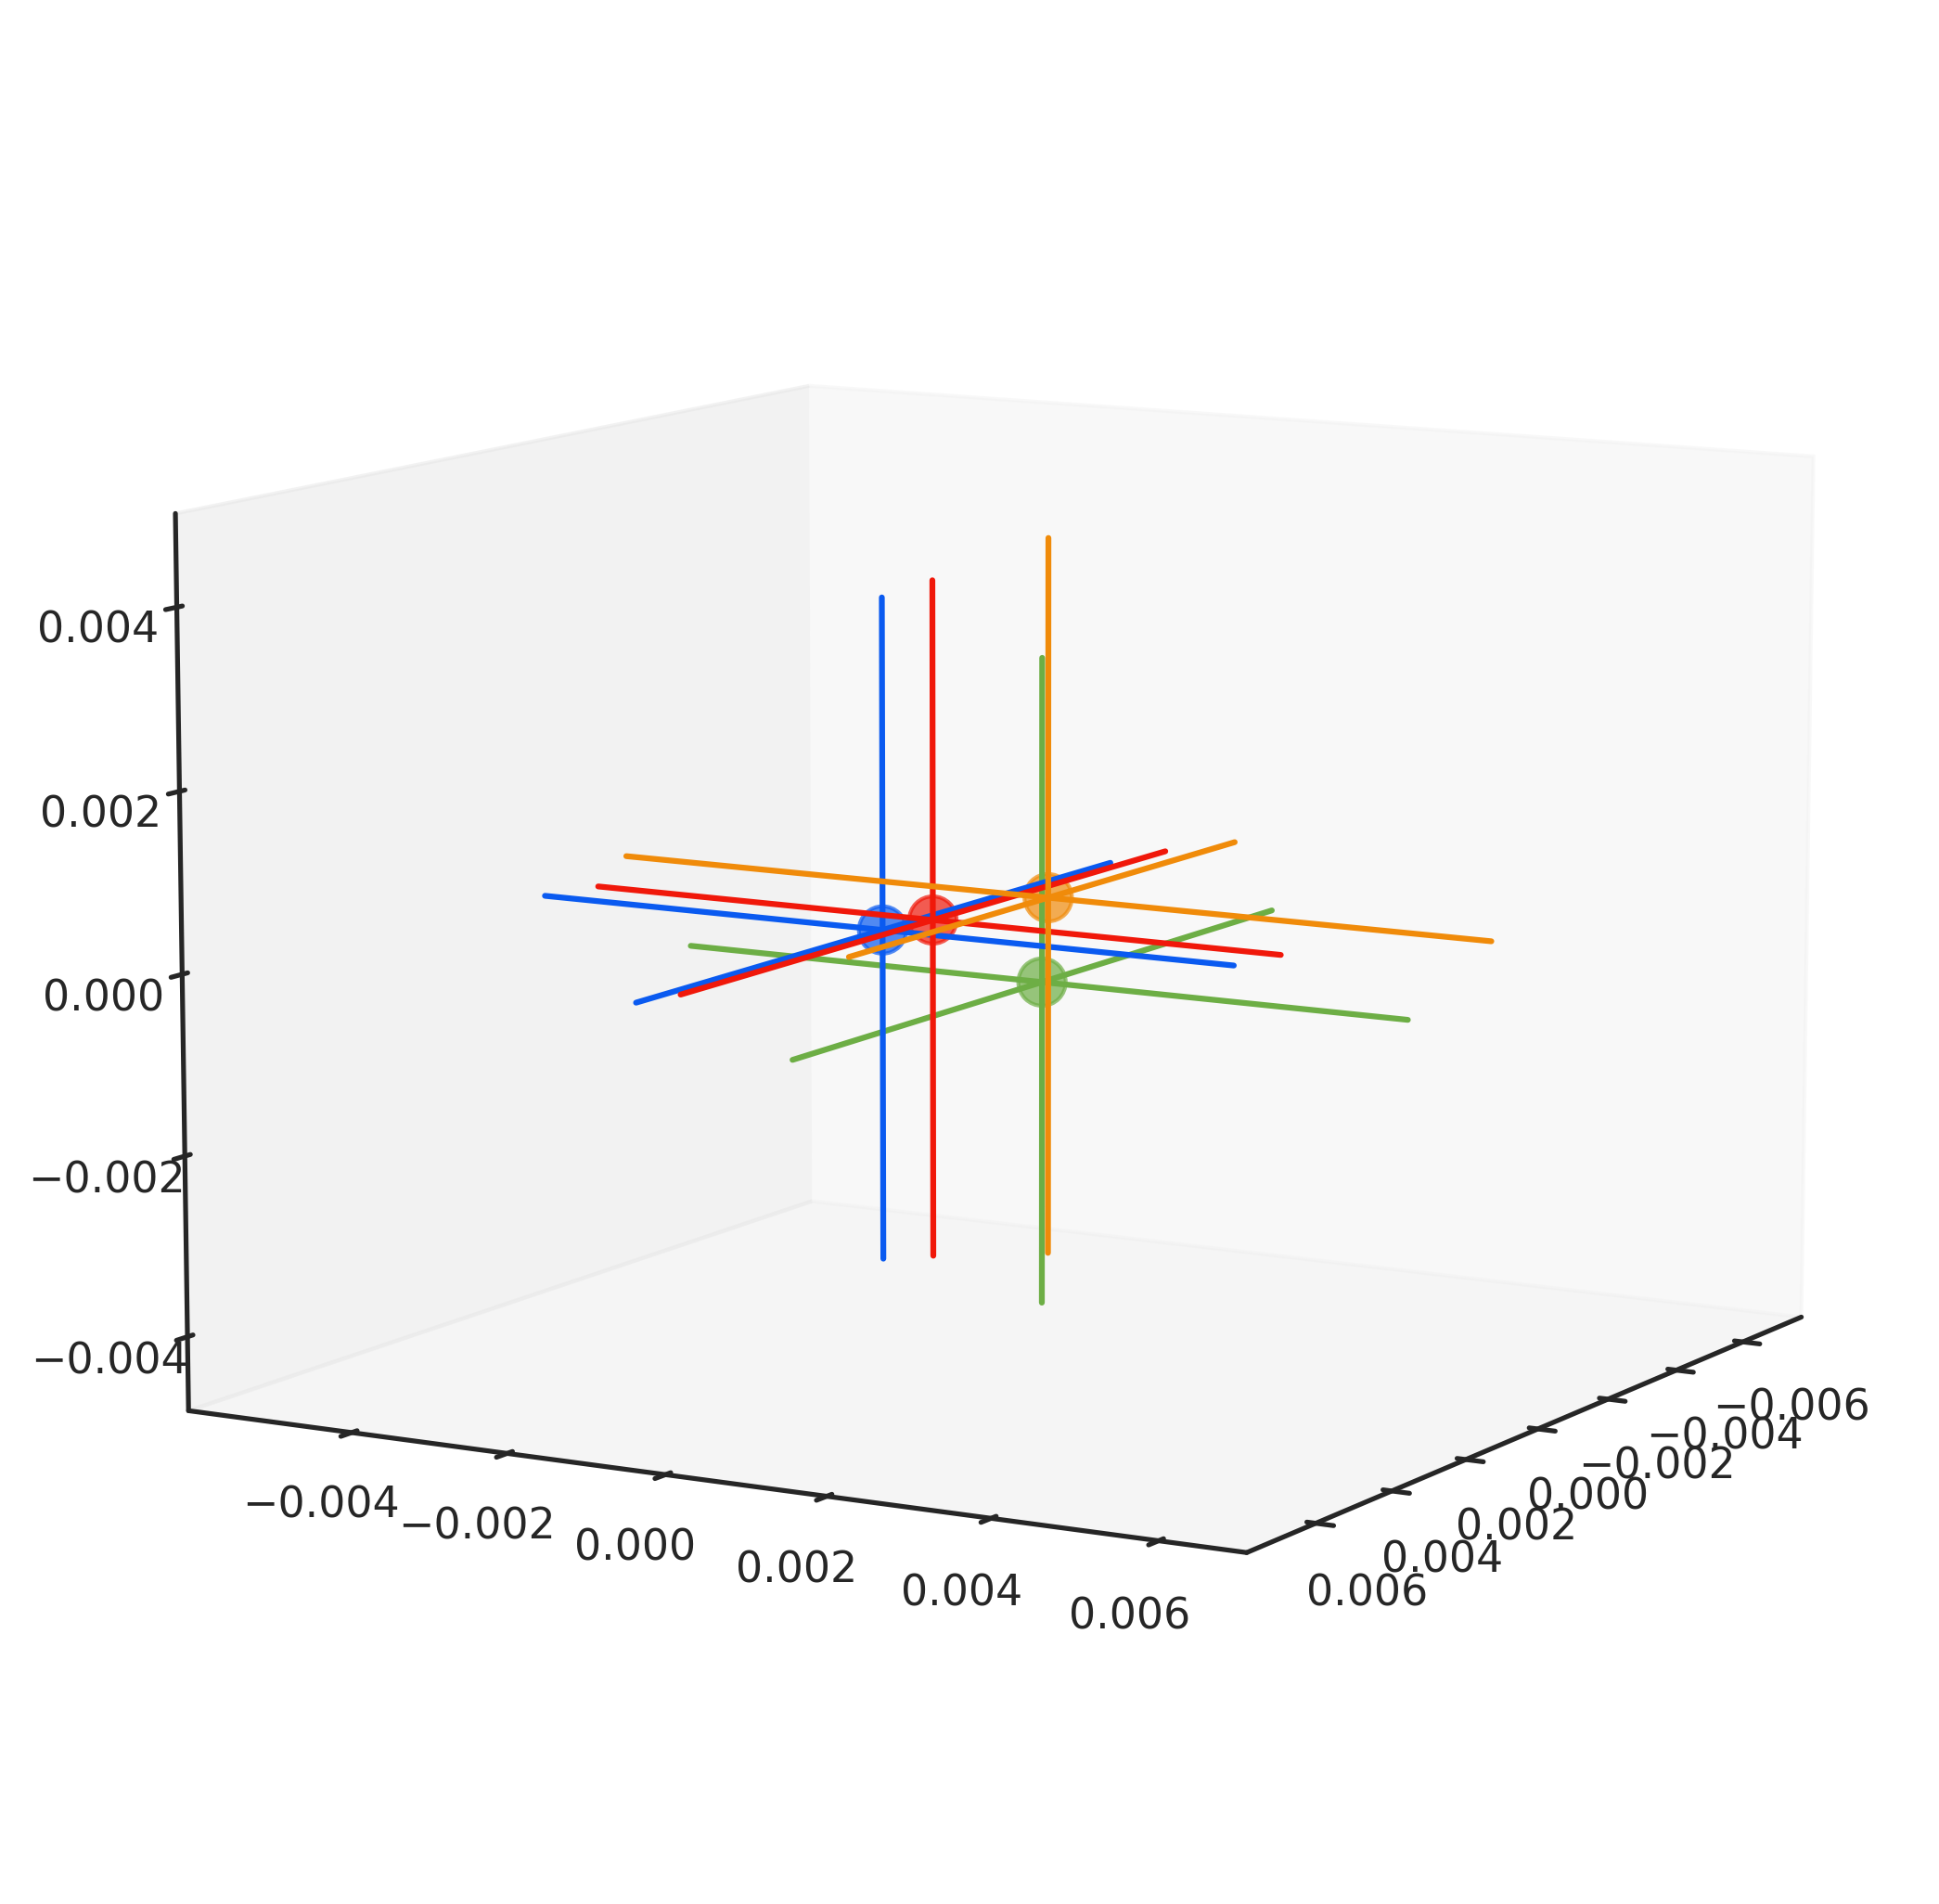

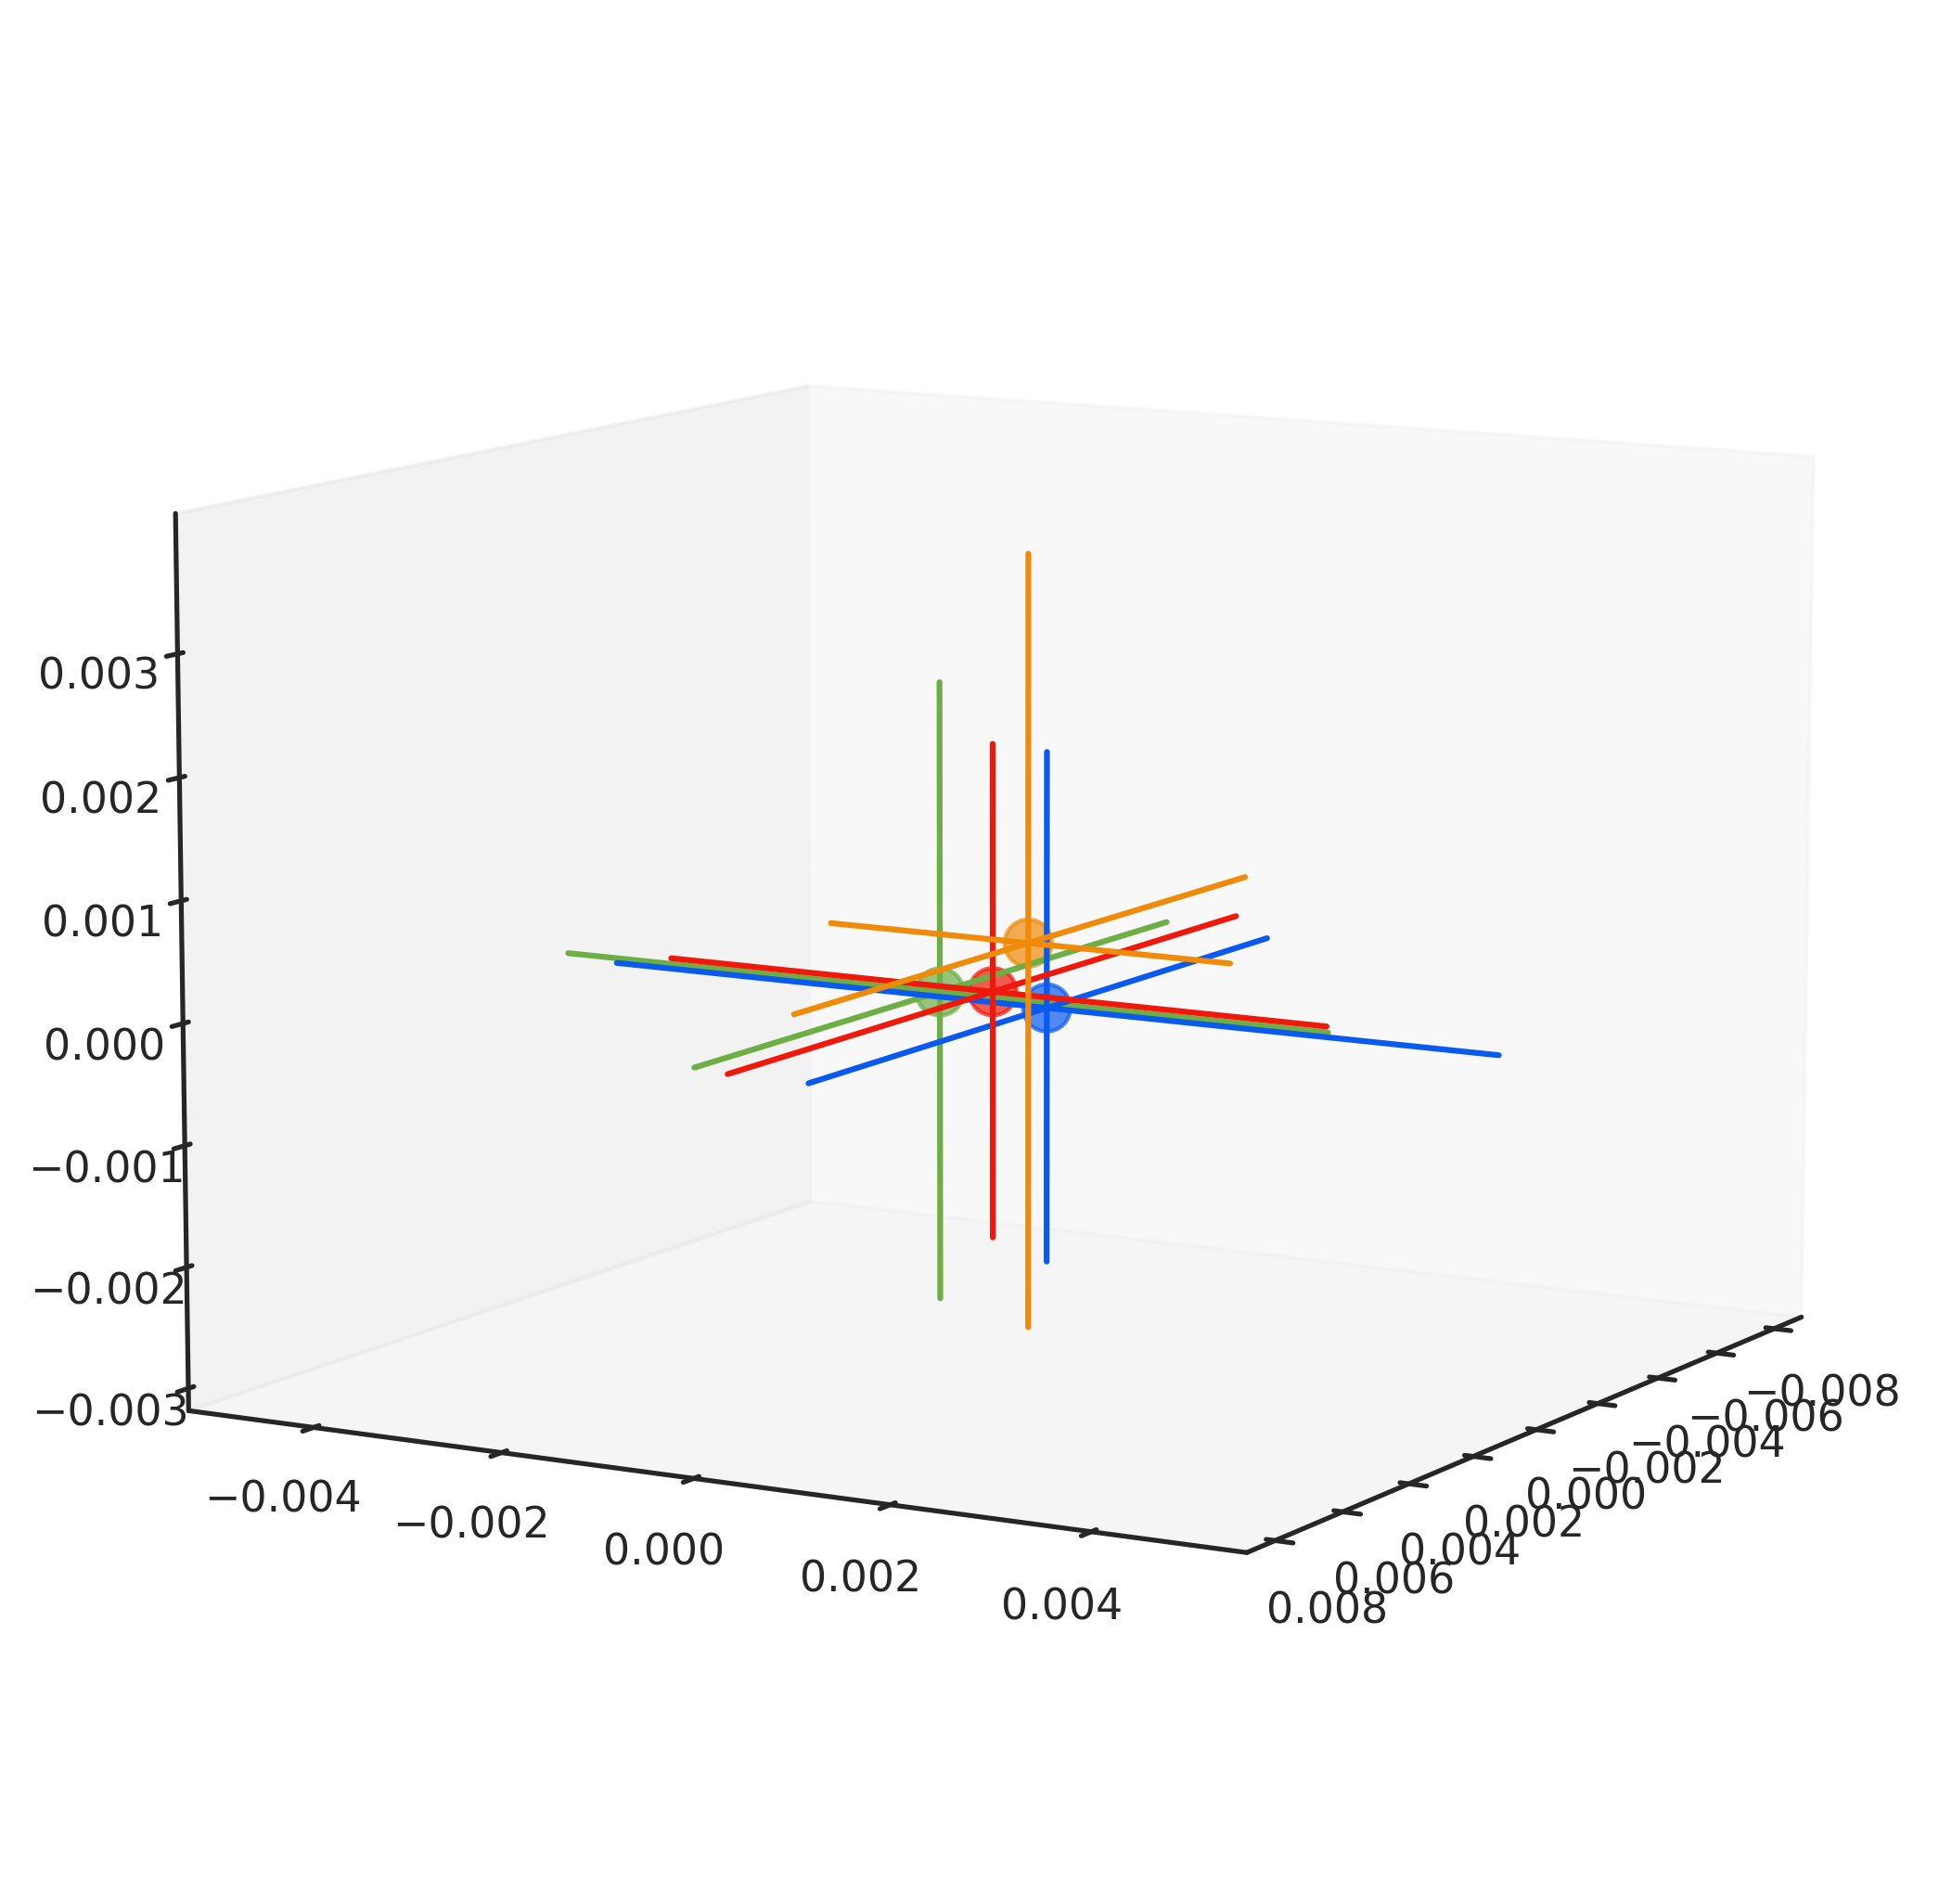

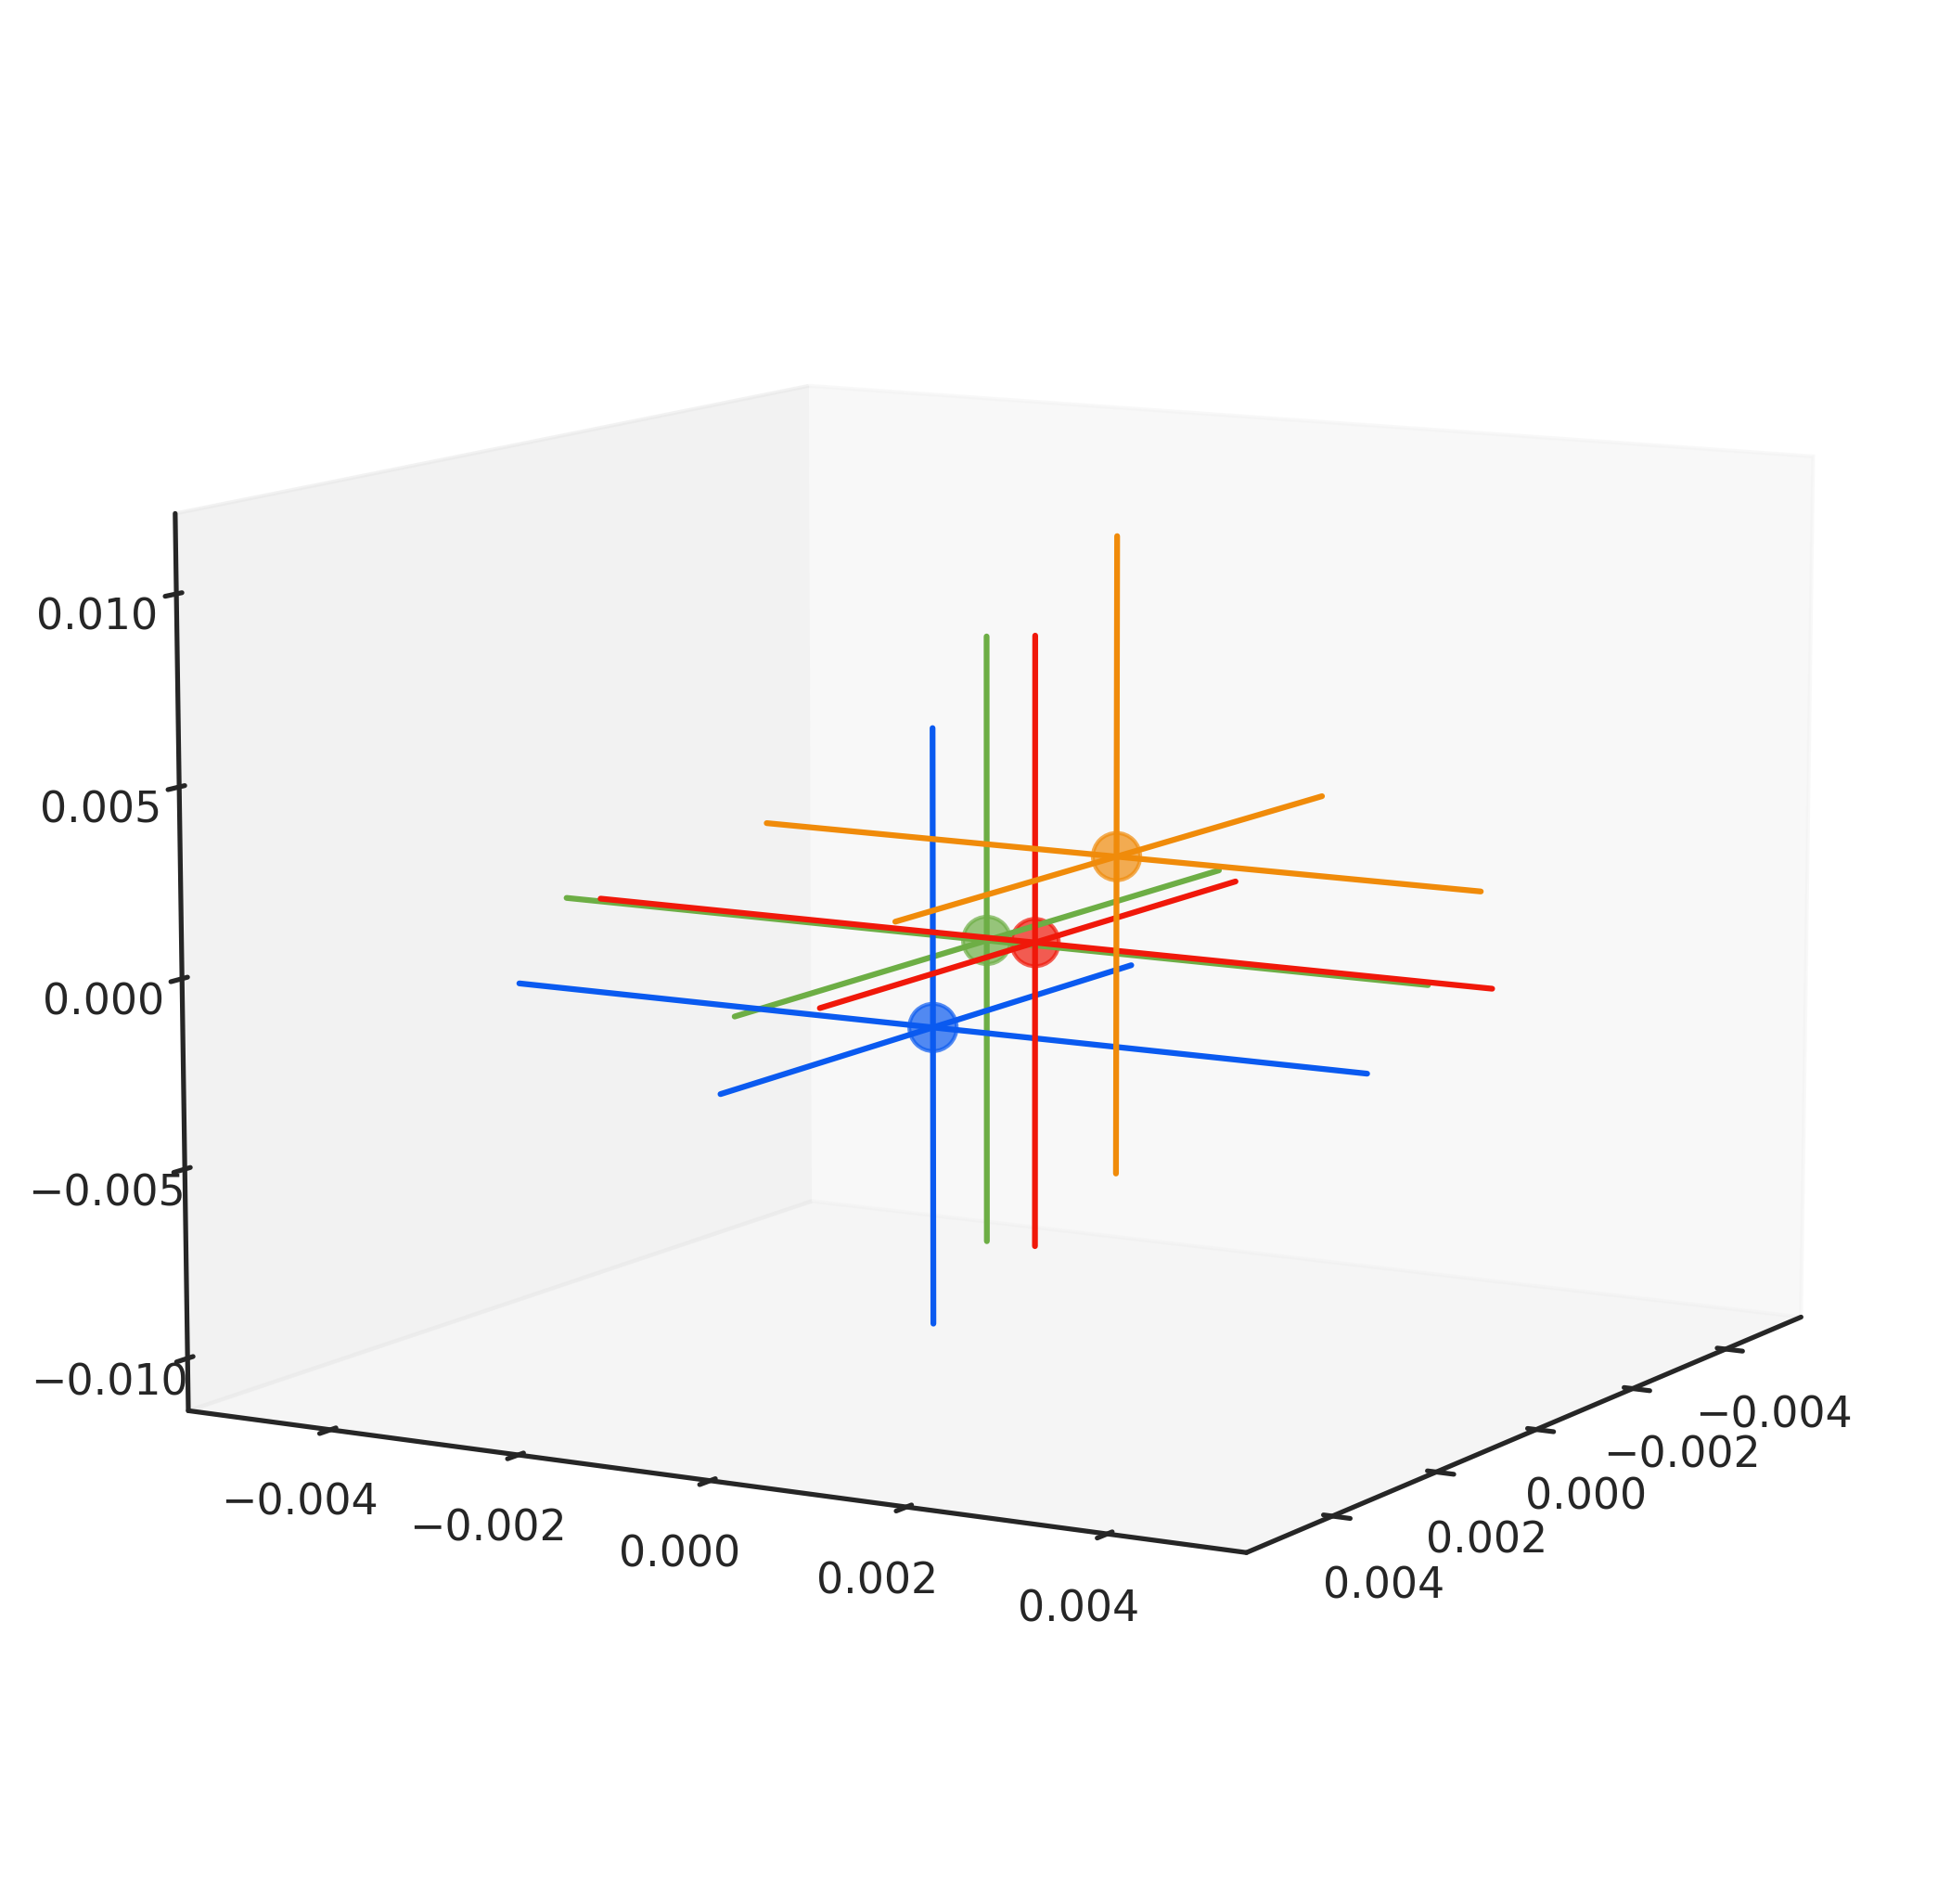

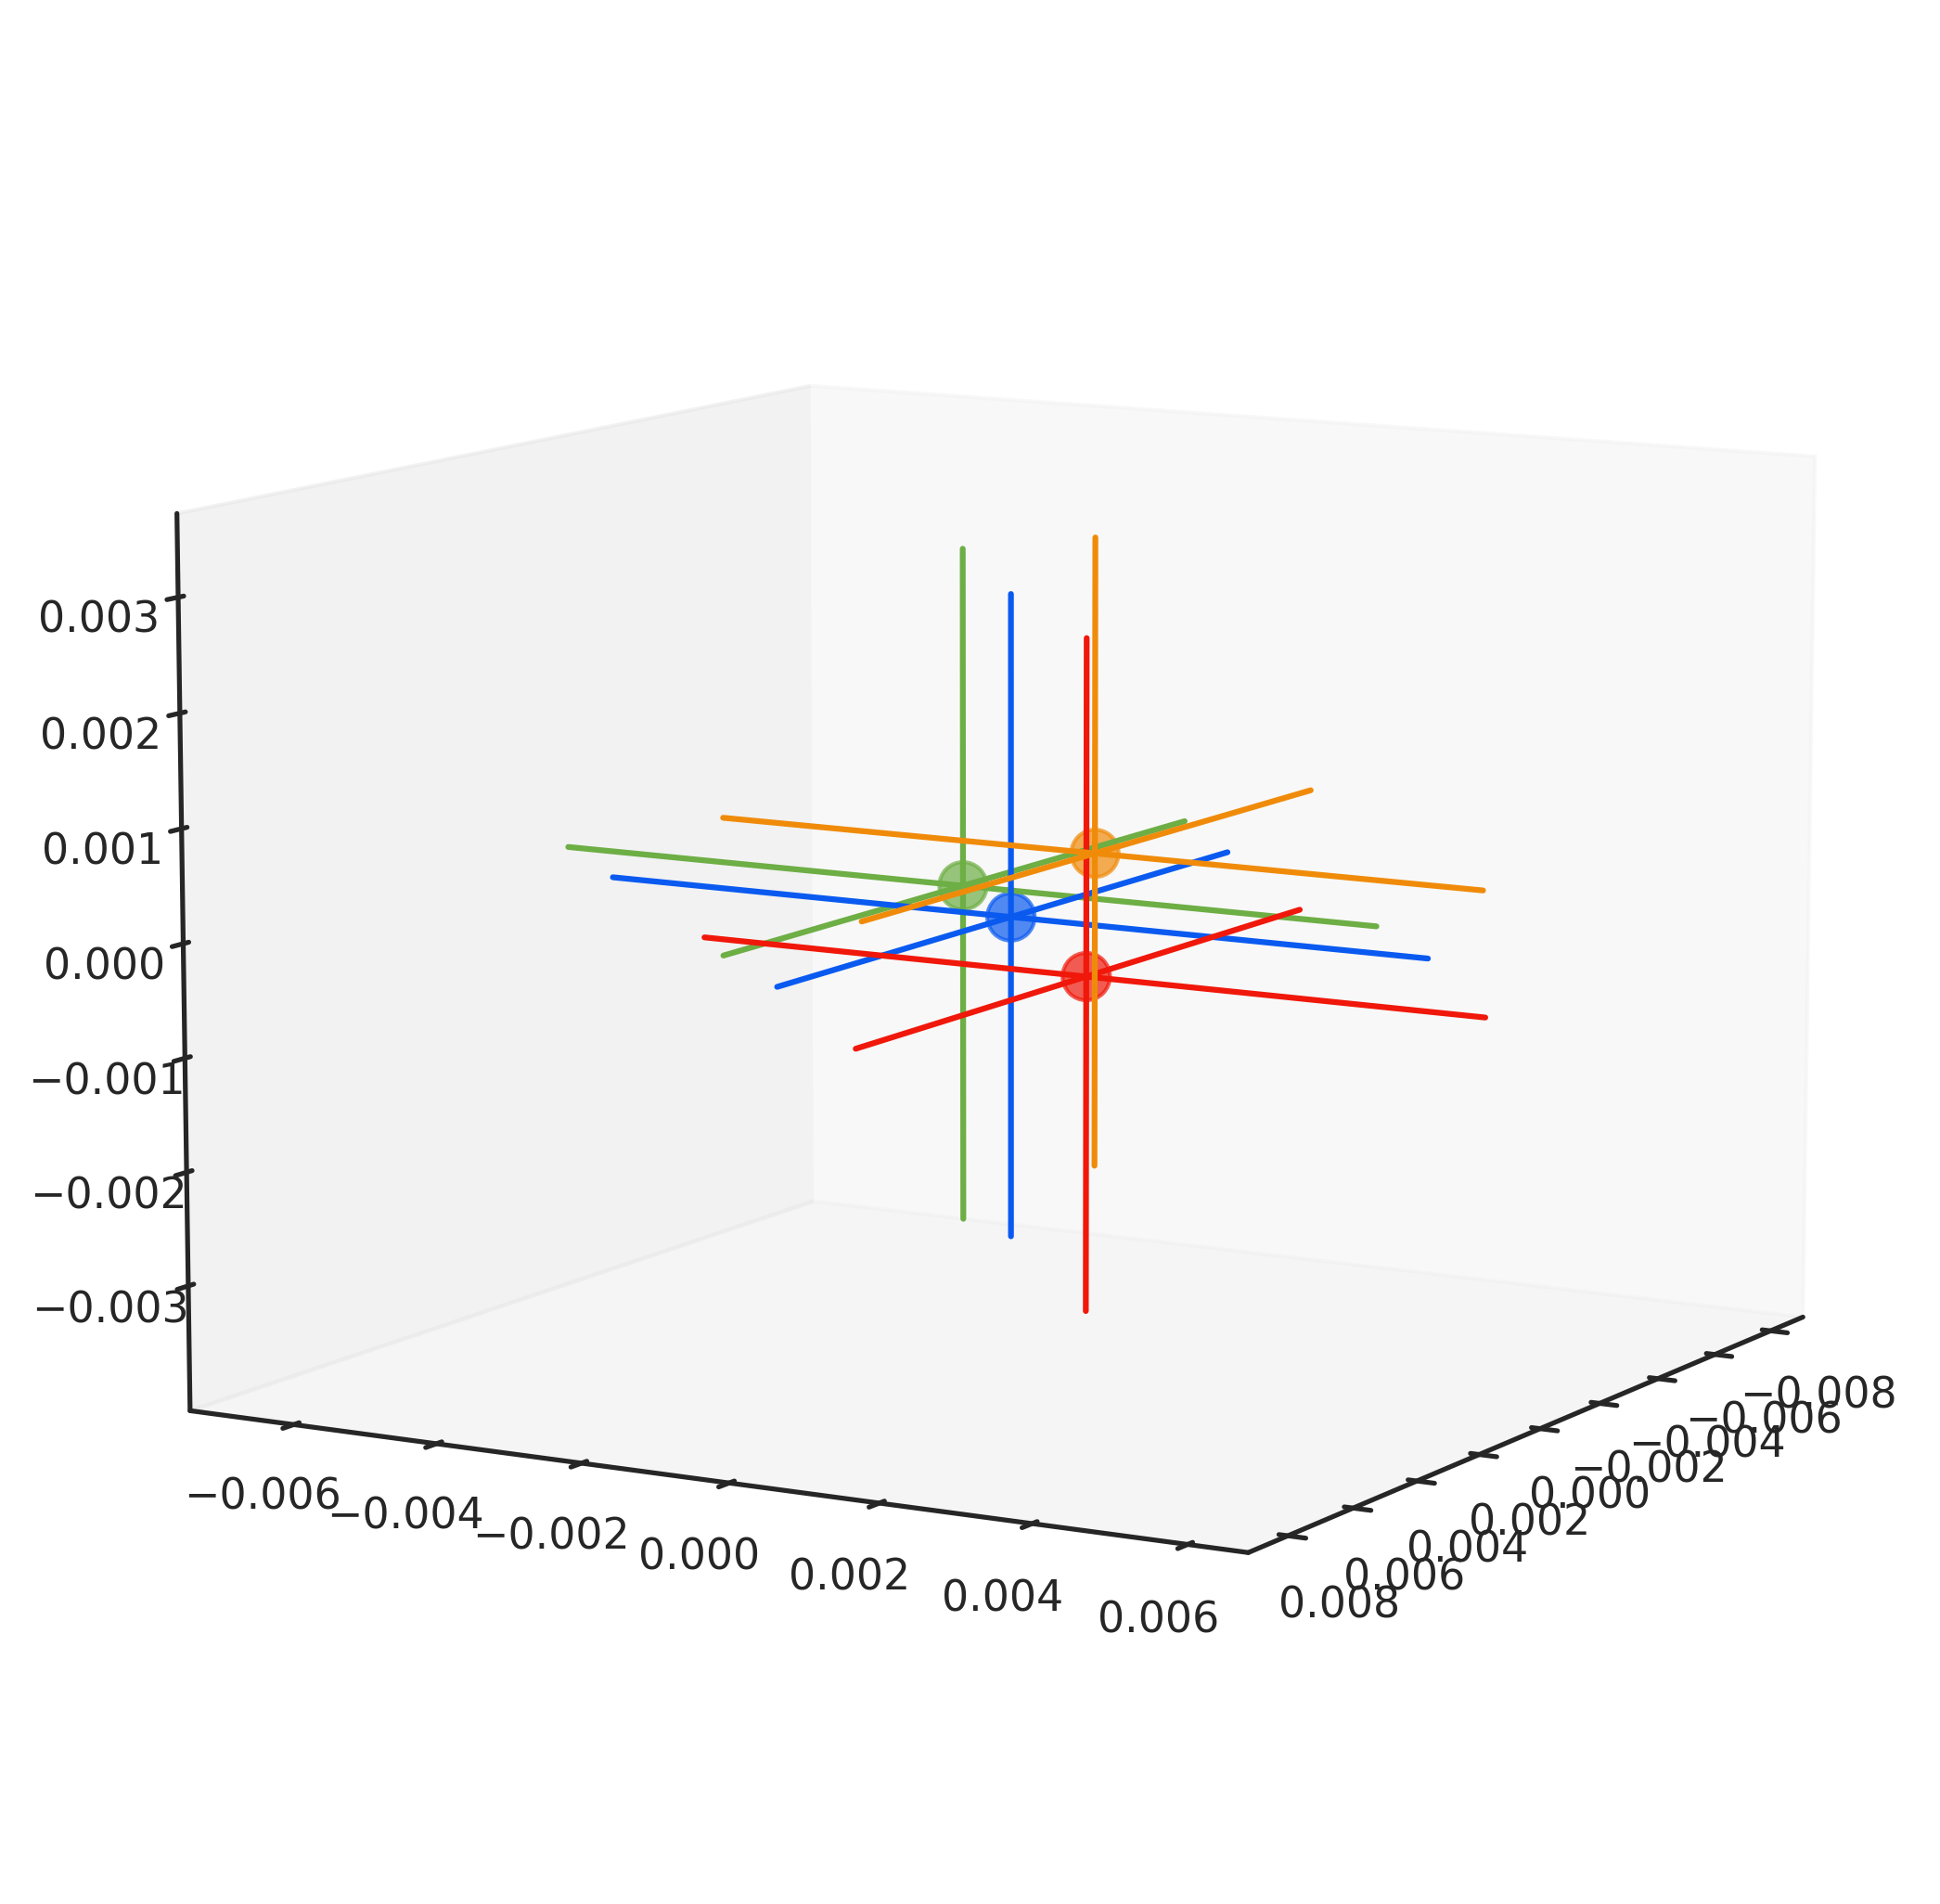

In [10]:
sub_distances(subj_outputs(subj_path[7]))

-------------- finished processing sub 4


,sub,maintain_clear_dmn,maintain_clear_fpcn,maintain_clear_smn,maintain_clear_vn,maintain_replace_fpcn,maintain_supress_fpcn,maintain_supress_vn,replace_clear_dmn,replace_clear_fpcn,...,replace_clear_vn,replace_supress_fpcn,replace_supress_vn,supress_clear_dmn,supress_clear_fpcn,supress_clear_smn,area_vn,area_smn,area_fpcn,area_dmn
0,4,0.009724,0.008715,0.00573,0.005058,0.006908,0.005247,0.002526,0.010333,0.013963,...,0.006253,0.008949,0.003583,0.007733,0.012505,0.00392,1.022712e-08,7.746706e-10,8.126676e-08,3.568767e-09


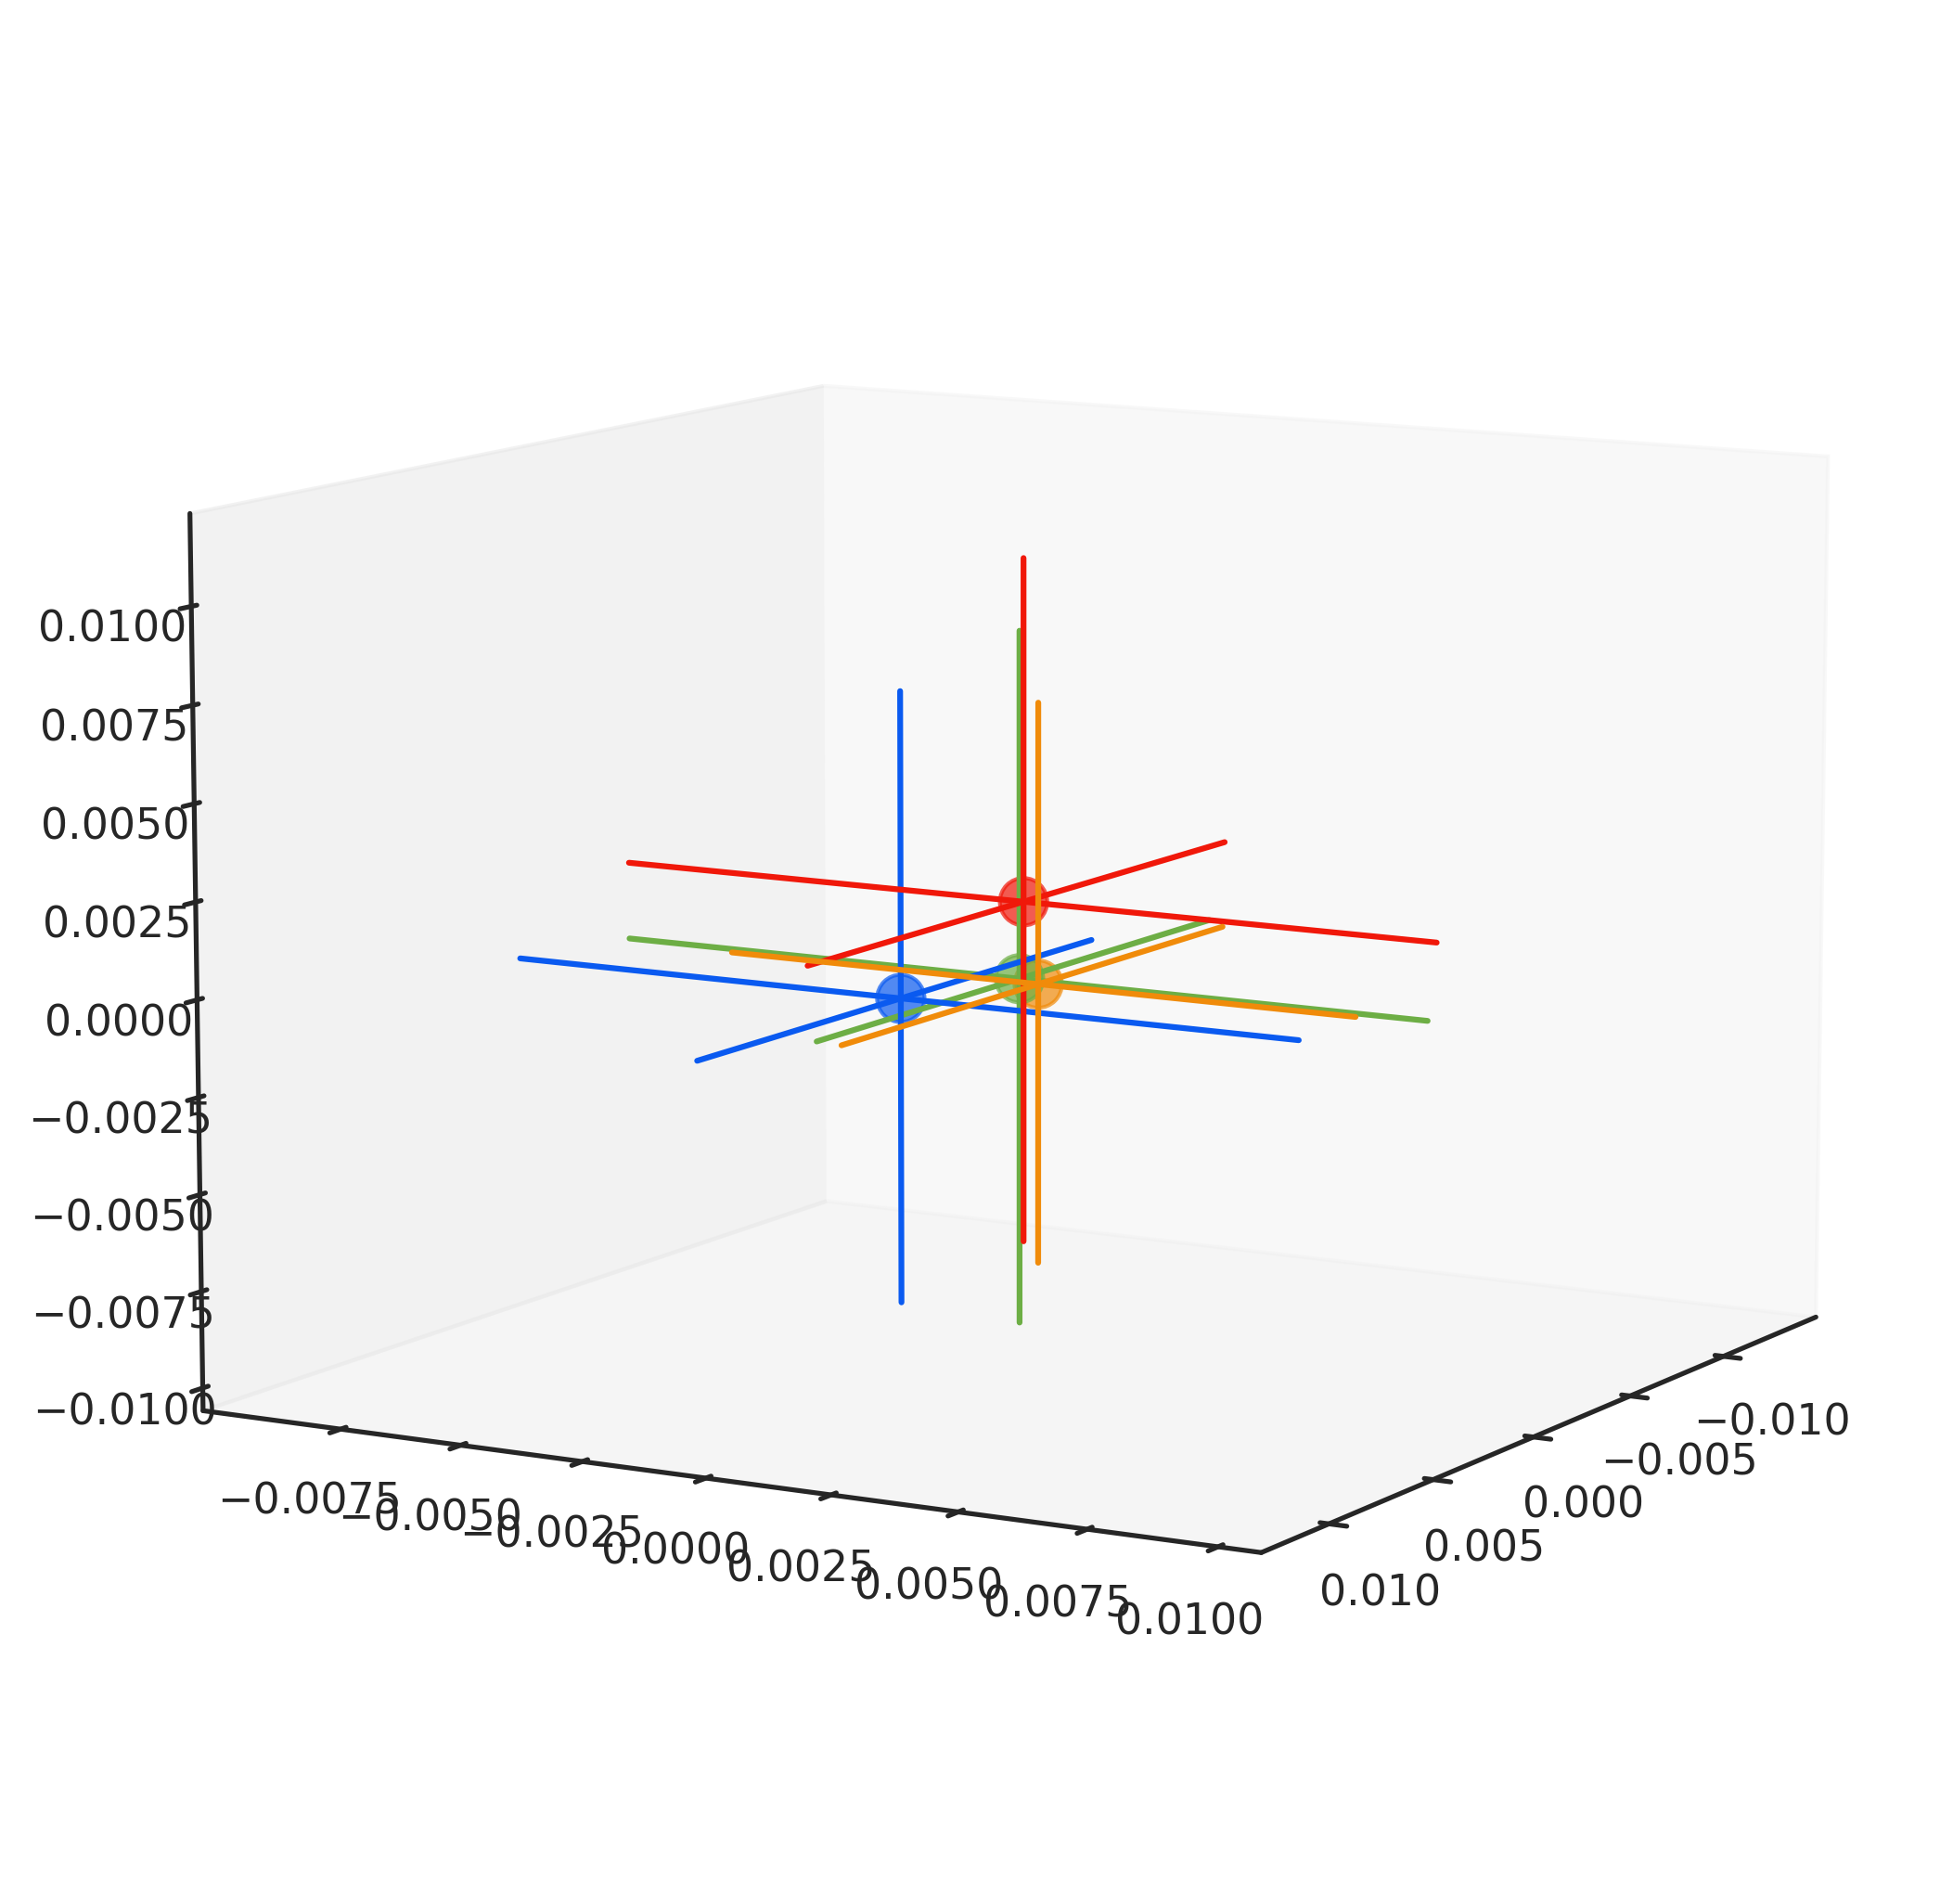

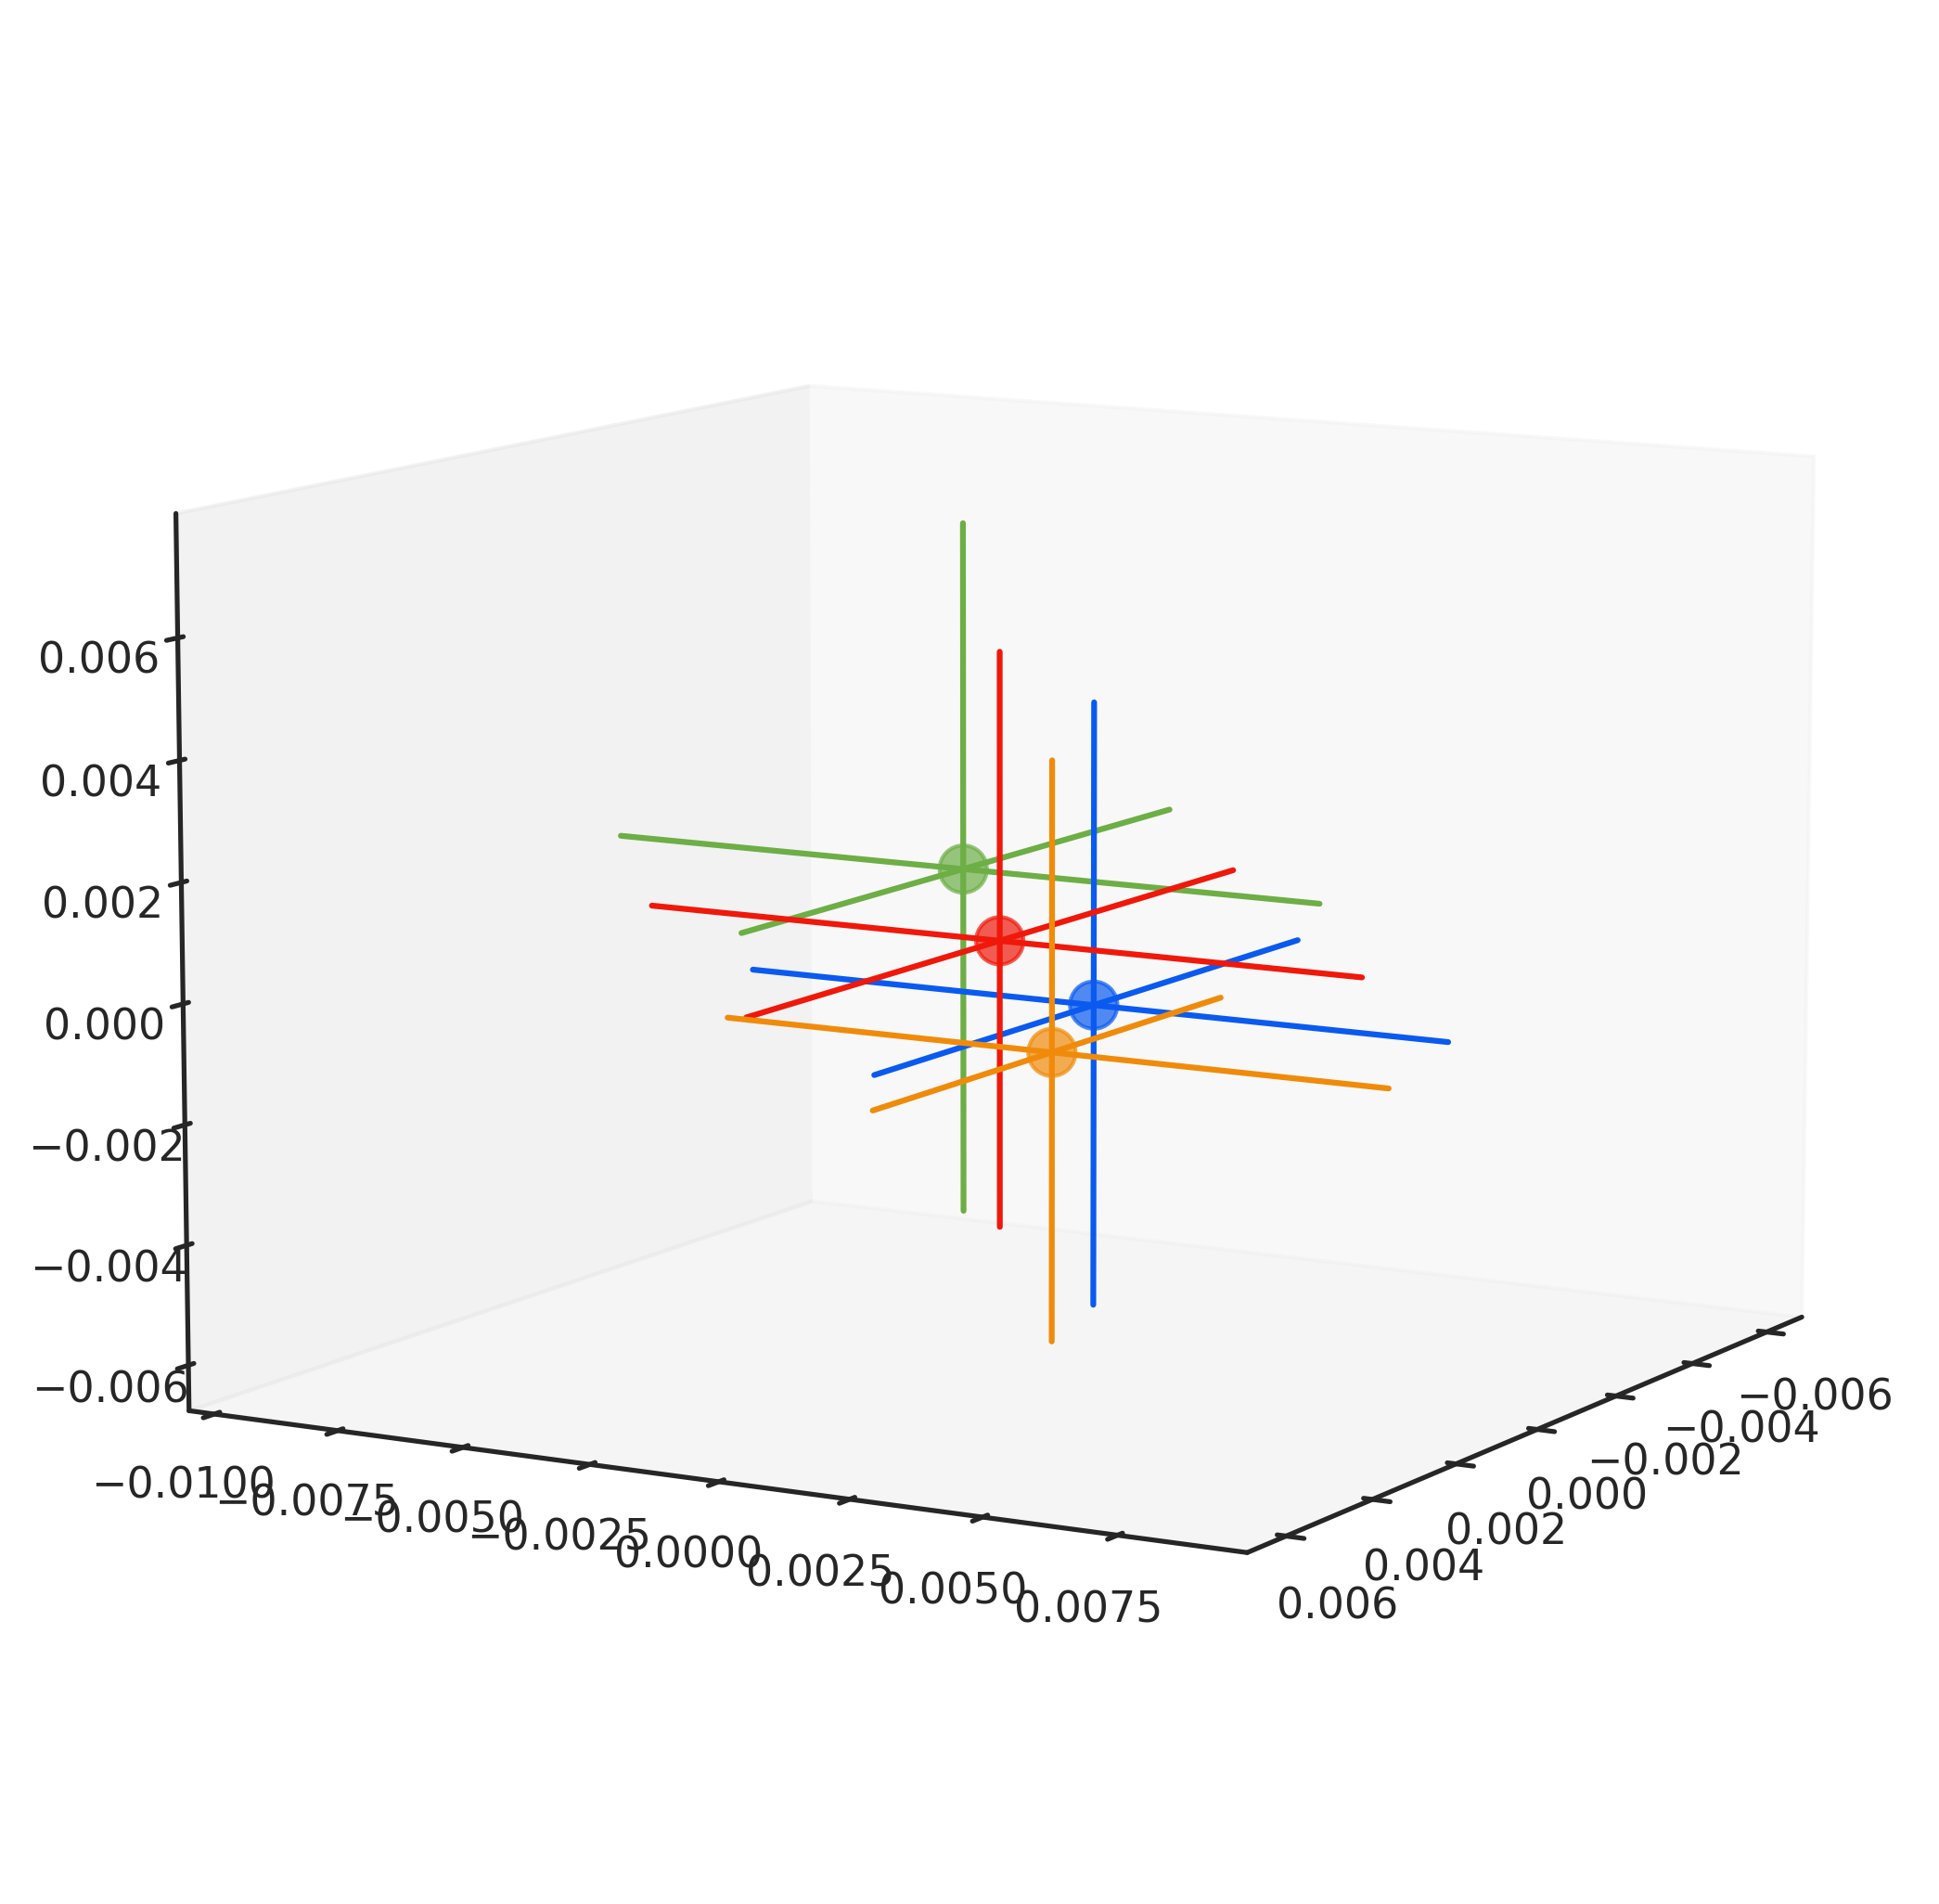

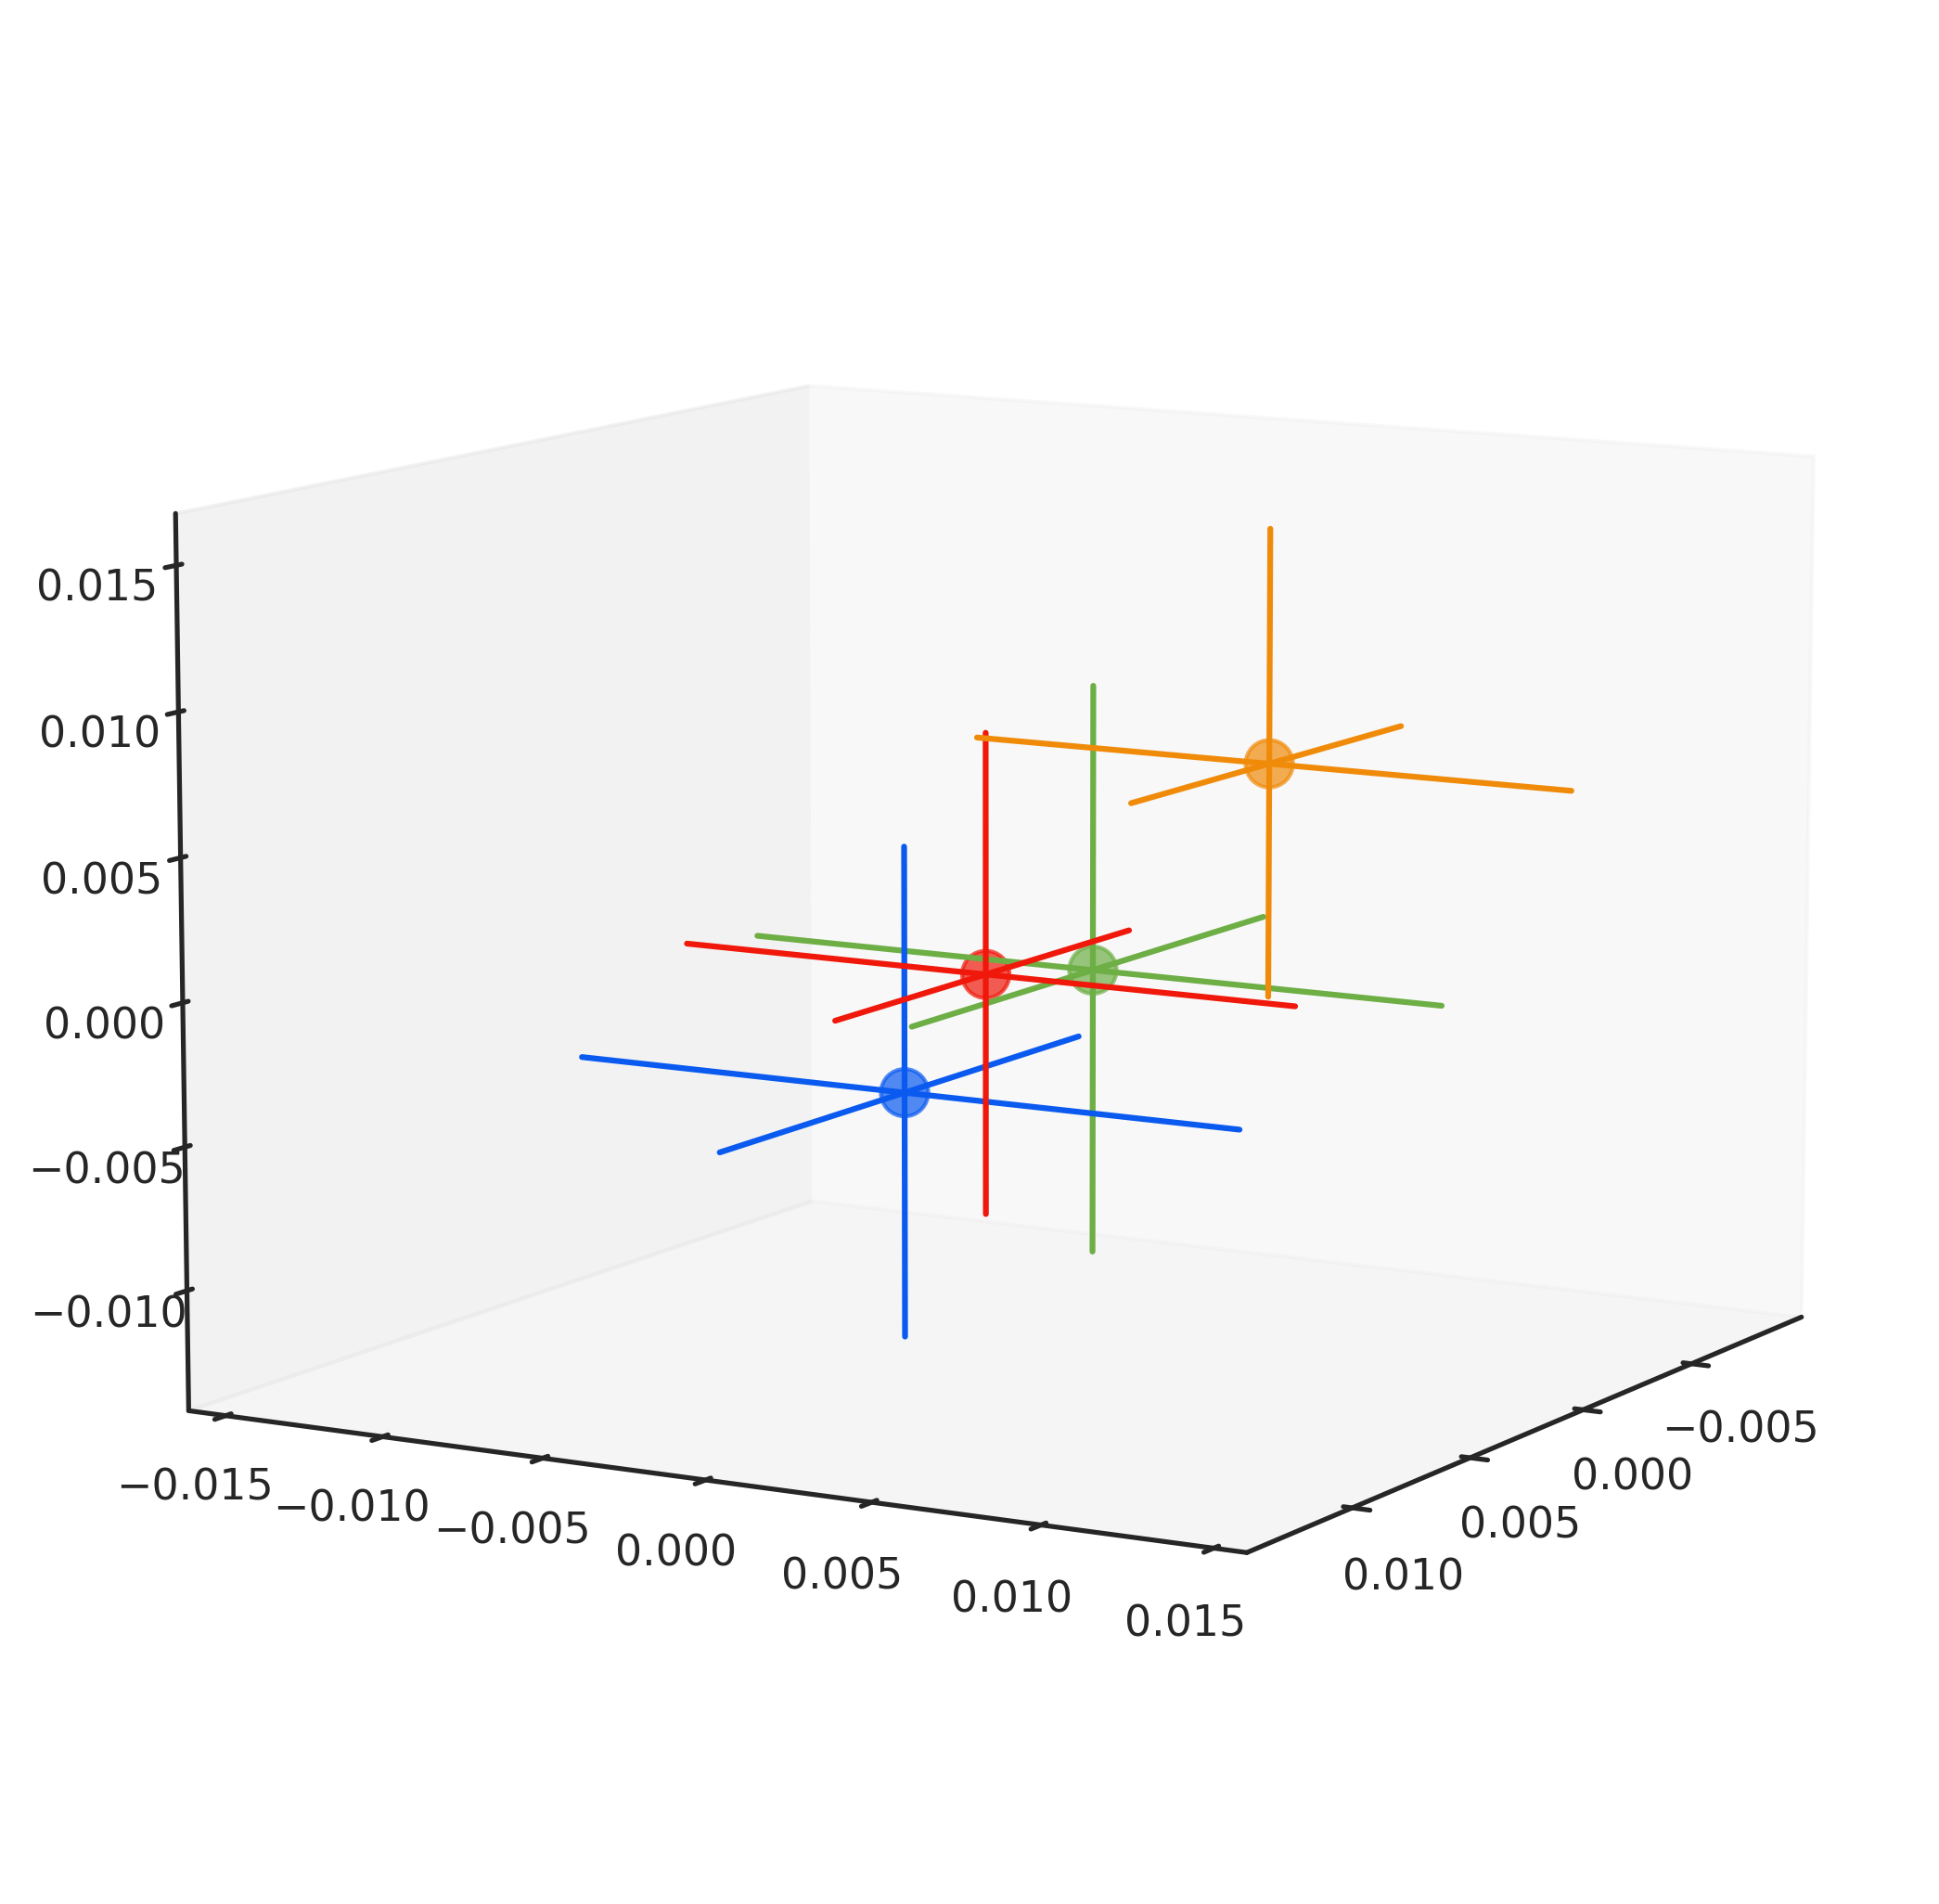

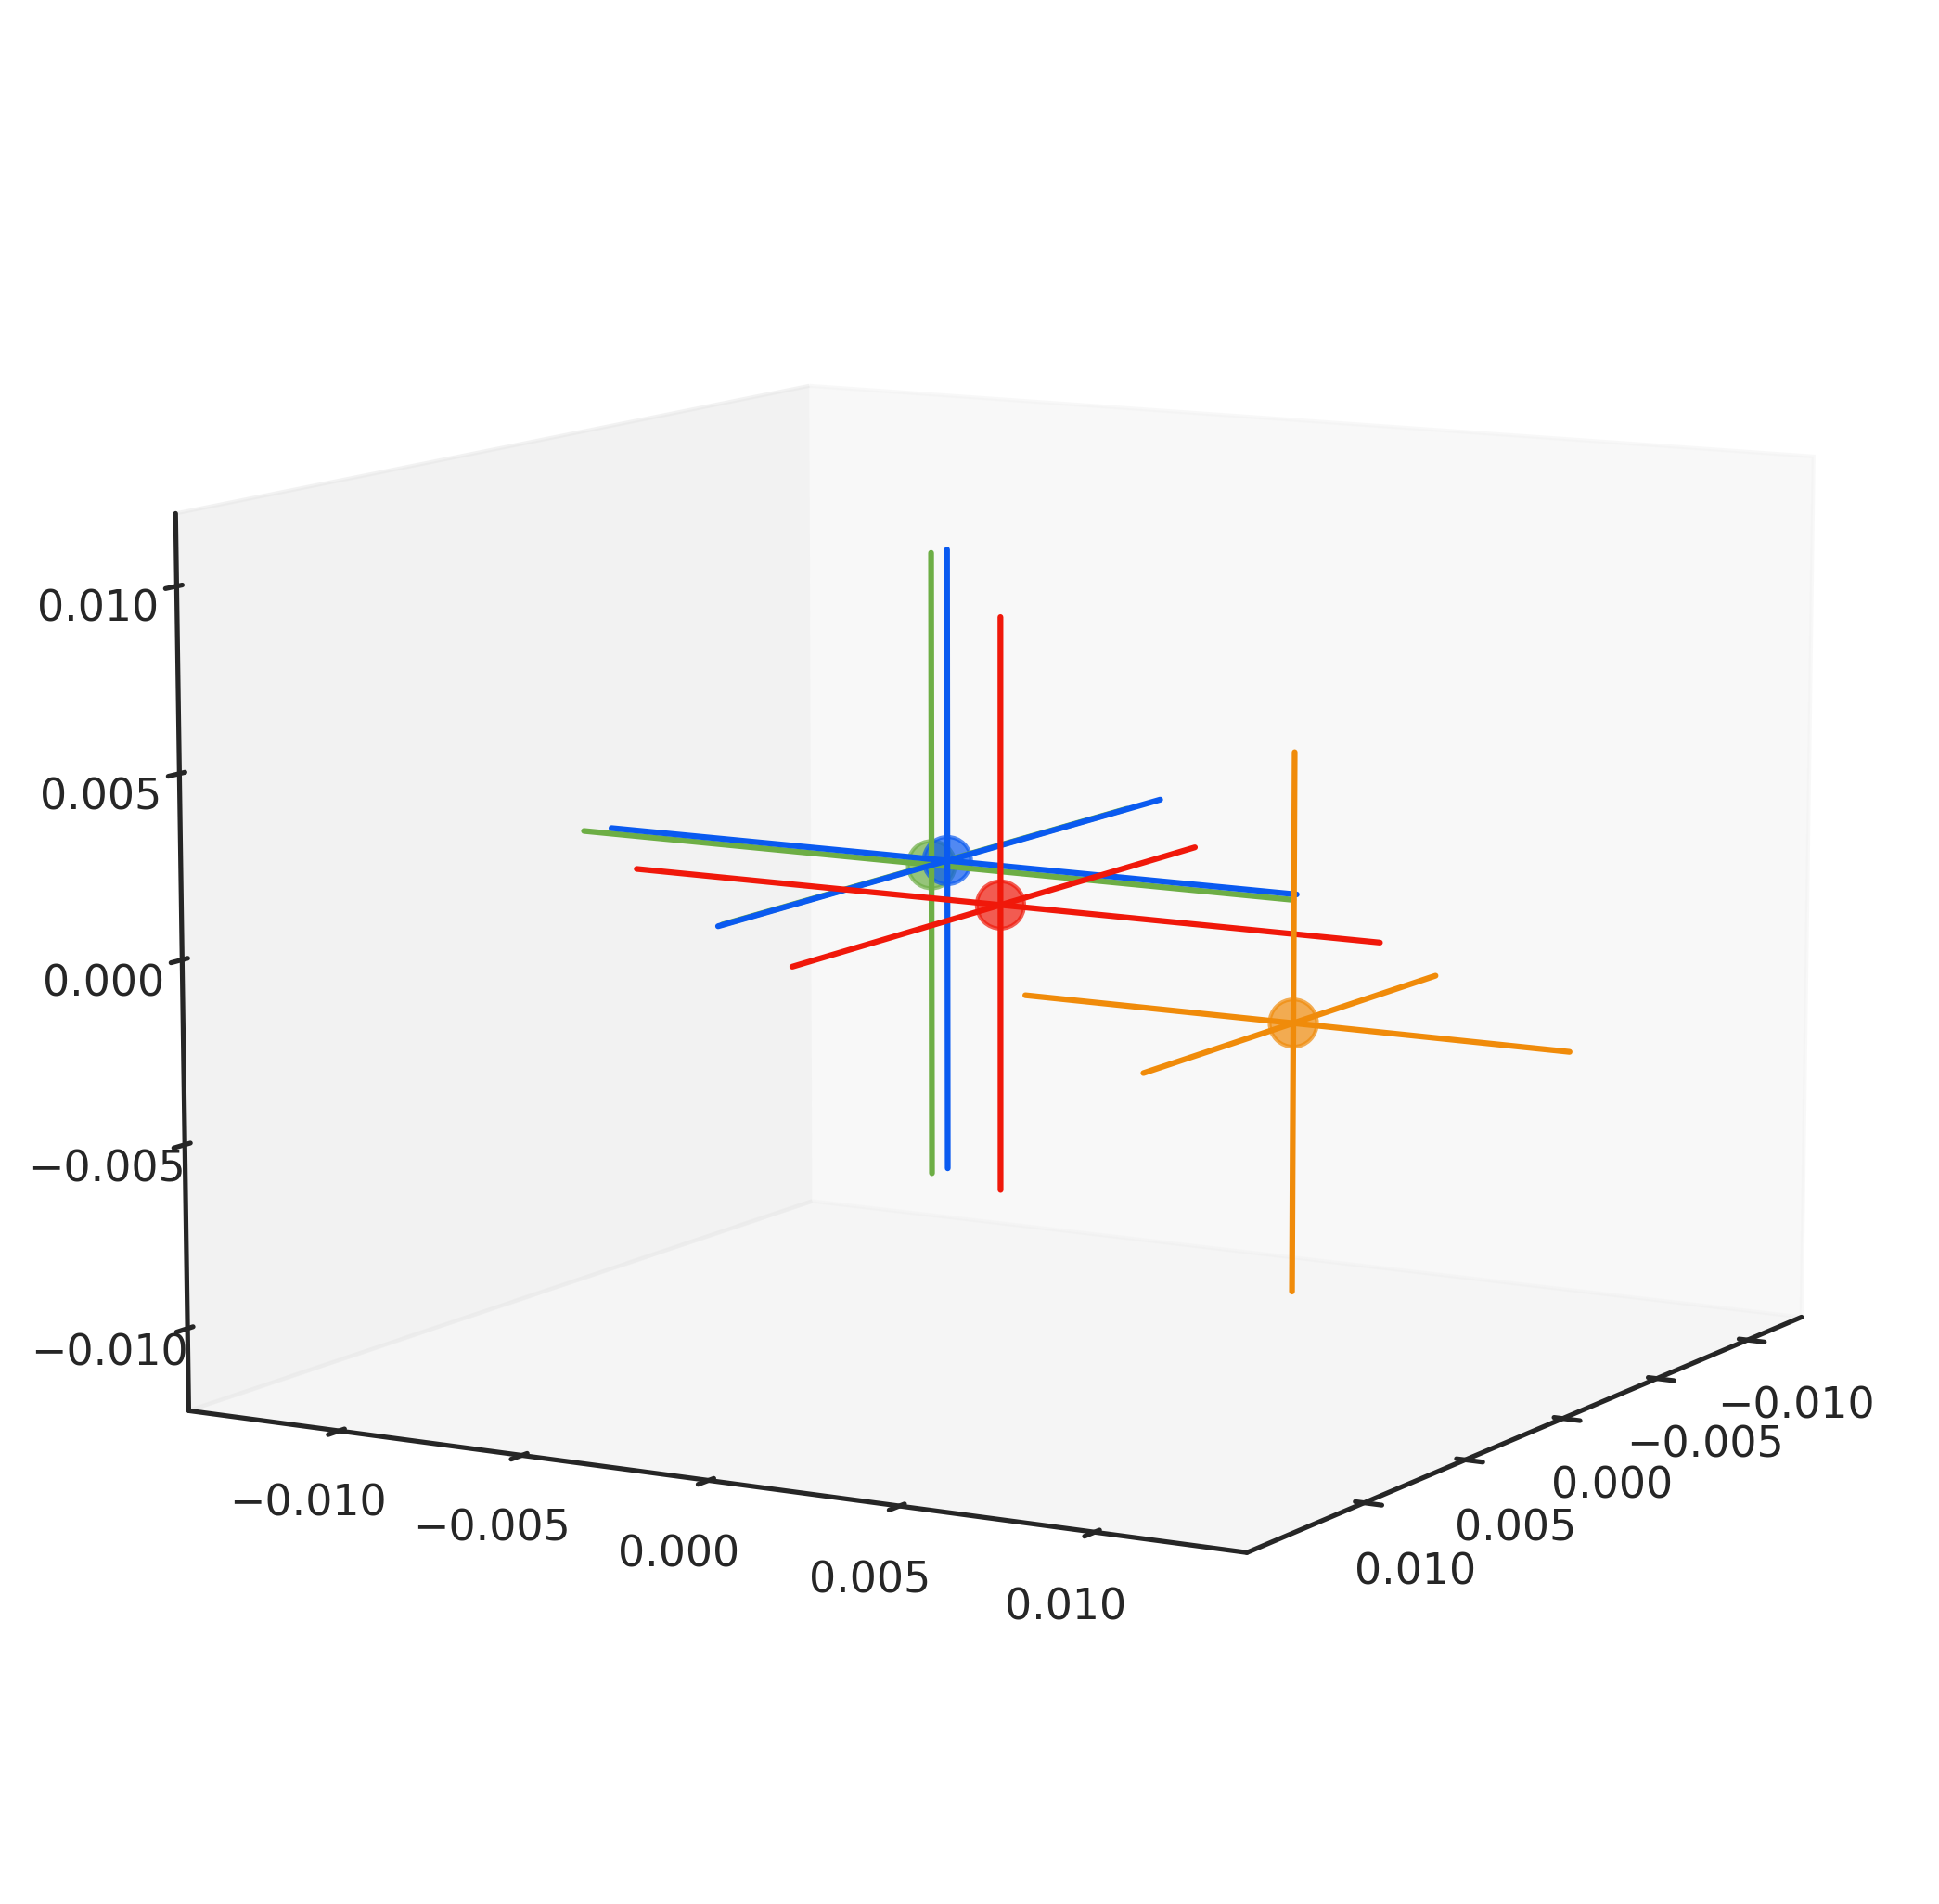

In [11]:
sub_distances(subj_outputs(subj_path[3]))

In [ ]:
#all_sub_outputs = []
#for i in subj_path:
#     all_sub_outputs.append(sub_distances(subj_outputs(i)))

In [ ]:
#output_sub_distances = pd.concat(all_sub_outputs)
#output_sub_distances.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/subj_net_distances.csv', index=False)

In [ ]:
#vn_distances = central_cluster_mds(test, 1, sub1_num_ops, sub1_ranges, 30, 100, outpath=None)
#vn_pull = ['maintain - supress', 'maintain - clear' , 'replace - clear', 'replace - supress']
#vn_distances = vn_distances.query('pair in @vn_pull').assign(network = 'vn')

In [ ]:
#smn_distances = central_cluster_mds(test, 2, sub1_num_ops, sub1_ranges, 30, 100, outpath=None)
#smn_pull = ['maintain - clear', 'replace - clear', 'supress - clear']
#smn_distances = smn_distances.query('pair in @smn_pull').assign(network = 'smn')

In [ ]:
#fpcn_distances = central_cluster_mds(test, 3, sub1_num_ops, sub1_ranges, 10, 30, outpath=None).assign(network = 'fpcn')

In [ ]:
#dmn_distances = central_cluster_mds(test, 4, sub1_num_ops, sub1_ranges, 10, 30, outpath=None)
#dmn_pull = ['supress - clear', 'maintain - clear' , 'replace - supress', 'supress - clear', 'maintain - supress']
#dmn_distances = dmn_distances.query('pair in @smn_pull').assign(network = 'dmn')

In [ ]:
'''
1) Apply Leiden networks to each person 
2) Concat parcels and apply MDS across all operations
3) For each person:
    - Spread 

VN:
M-S, M-C, R-S, R-C

SMN:
C-M, C-R, C-S,

FPN:
Spread across all of them? 

DMN:
S-C, S-M, S-R, C-M, C-R
'''

In [26]:
!jupyter nbconvert --to script subject_network_distances.ipynb

[NbConvertApp] Converting notebook subject_network_distances.ipynb to script
[NbConvertApp] Writing 27955 bytes to subject_network_distances.py
